In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define column names based on the user's description
column_names = ['X', 'Y', 'Z', 'Roll', 'Pitch', 'Yaw']

# Reload the data with the correct column names
translation_data = pd.read_csv('trans_data.csv', header=None, names=column_names)
roll_data = pd.read_csv('roll_data.csv', header=None, names=column_names)
pitch3_data = pd.read_csv('pitch3_data.csv', header=None, names=column_names)

In [2]:
# Checking assumption of 50hz update frequency
# 
# Update the assumed publish rate to 50 Hz
publish_rate = 50  # Hz

num_data_points = len(translation_data)

total_trial_time = num_data_points / publish_rate

# Recalculate total trial time in seconds with the updated publish rate
total_trial_time_updated = num_data_points / publish_rate


# Recalculate the difference from the expected 70 seconds with the updated publish rate
difference_from_expected_updated = total_trial_time_updated - 70

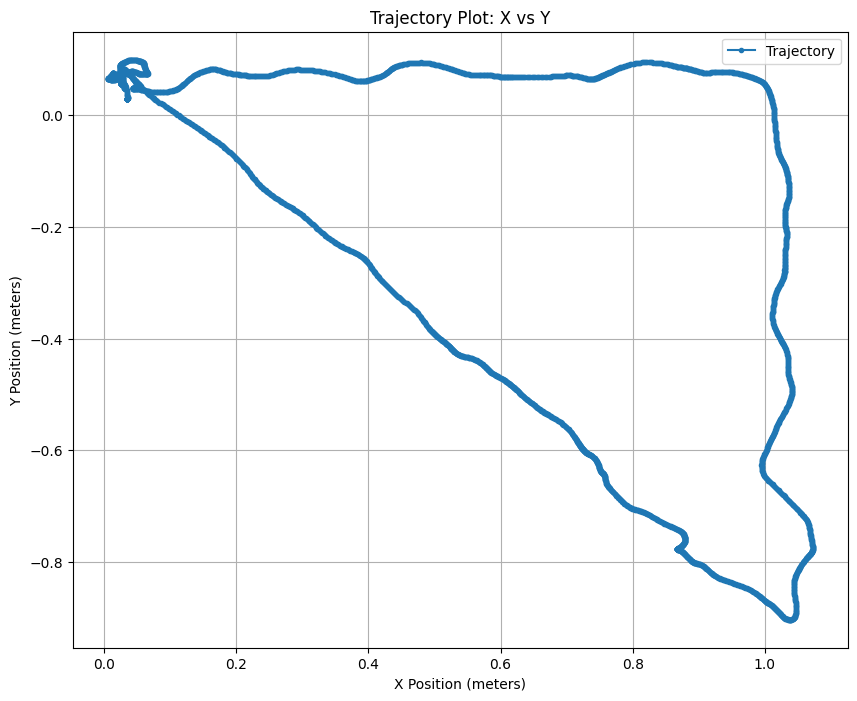

In [3]:
# Plot X vs Y for the trajectory
plt.figure(figsize=(10, 8))
plt.plot(translation_data['X'], translation_data['Y'], label='Trajectory', marker='.', linestyle='-')
plt.title('Trajectory Plot: X vs Y')
plt.xlabel('X Position (meters)')
plt.ylabel('Y Position (meters)')
plt.grid(True)
plt.legend()
plt.show()

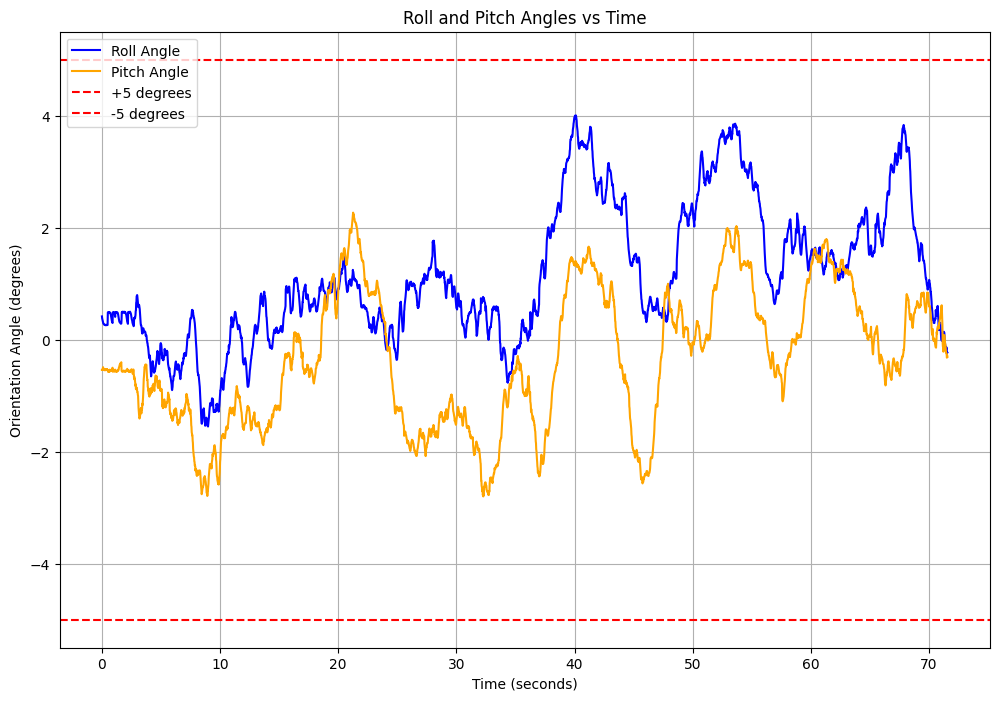

In [4]:
# Convert Pitch from radians to degrees for consistency
translation_data['Pitch_deg'] = np.degrees(translation_data['Pitch'])
translation_data['Roll_deg'] = np.degrees(translation_data['Roll'])
translation_data['Yaw_deg'] = np.degrees(translation_data['Yaw'])
translation_data['Time'] = translation_data.index / 50 
# Plot X position against both Roll and Pitch angles in degrees on the same plot
plt.figure(figsize=(12, 8))
plt.plot(translation_data['Time'], translation_data['Roll_deg'], label='Roll Angle',  linestyle='-', color='blue')
plt.plot(translation_data['Time'], translation_data['Pitch_deg'], label='Pitch Angle',  linestyle='-', color='orange')
#plt.plot(translation_data['Time'], translation_data['Yaw_deg'], label='Yaw Angle',  linestyle='-', color='green')
plt.axhline(y=5, color='r', linestyle='--', label='+5 degrees')
plt.axhline(y=-5, color='r', linestyle='--', label='-5 degrees')
plt.title('Roll and Pitch Angles vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Orientation Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()

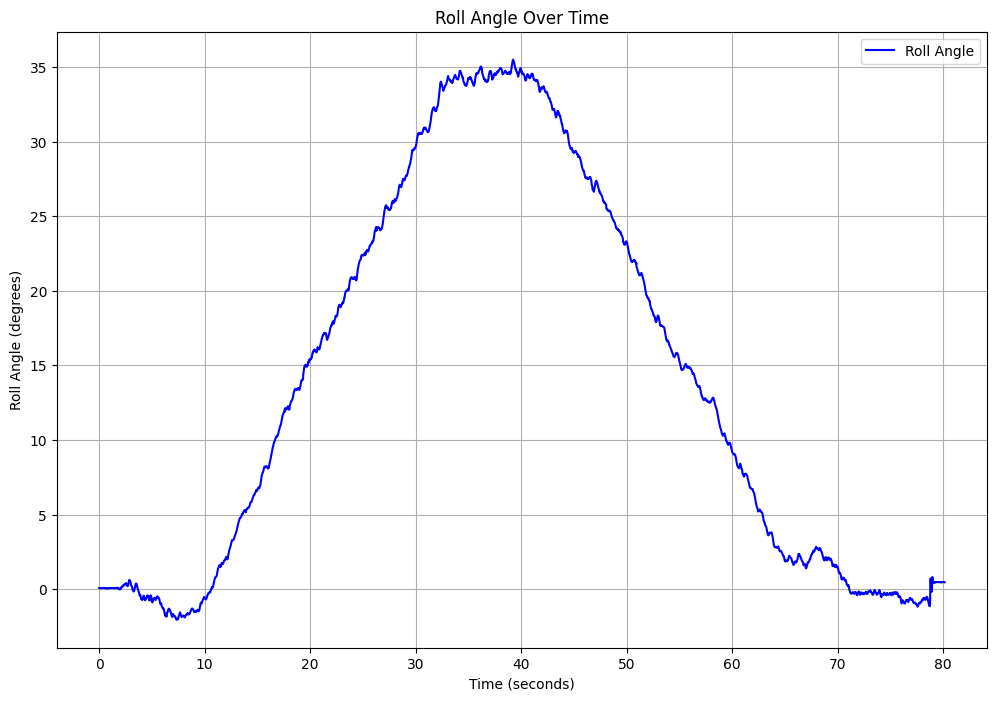

In [5]:
roll_data['Roll_deg'] = np.degrees(roll_data['Roll'])

# Assuming each row corresponds to 1/50th of a second, create a time column
roll_data['Time'] = roll_data.index / 50  # Dataset was collected at 50 Hz

# Plot Roll angle in degrees over time for the second dataset
plt.figure(figsize=(12, 8))
plt.plot(roll_data['Time'], roll_data['Roll_deg'], label='Roll Angle', color='blue')
plt.title('Roll Angle Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Roll Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()

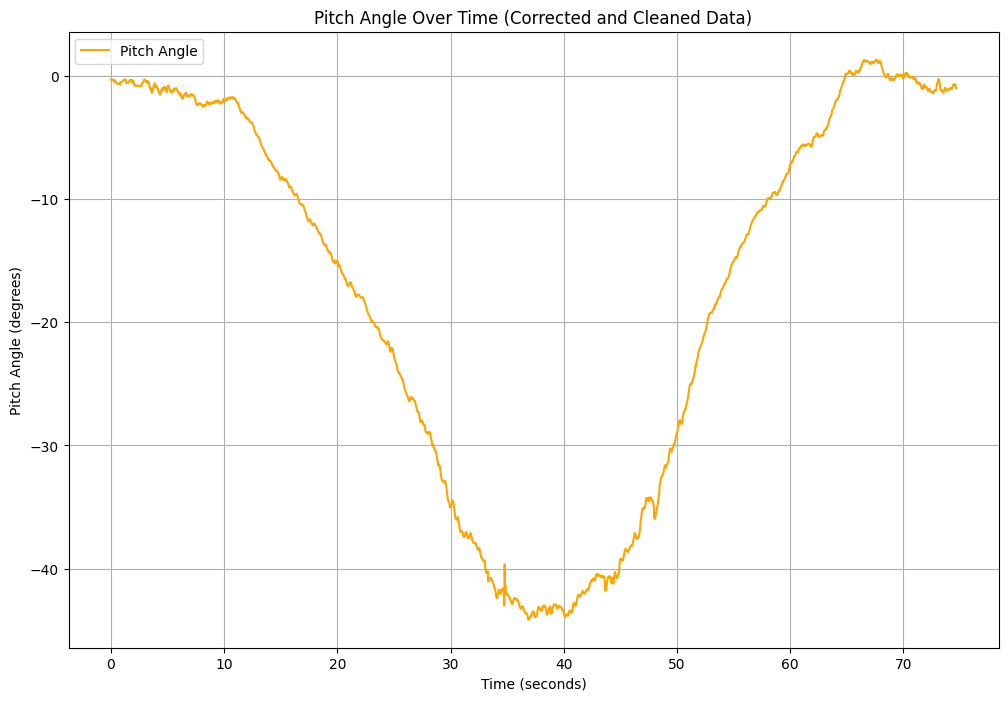

In [6]:
pitch3_data['Pitch_deg'] = np.degrees(pitch3_data['Pitch'])

# Assuming each row corresponds to 1/50th of a second, create a time column for the new dataset
pitch3_data['Time'] = pitch3_data.index / 50  # Dataset was collected at 50 Hz

# Calculate the difference between subsequent pitch angle measurements
pitch3_data['Pitch_diff'] = pitch3_data['Pitch_deg'].diff().abs()

# Identify points where the difference is unusually large, for example, more than a certain threshold
# Choosing a threshold is somewhat arbitrary, but we'll use a relatively large number to catch the significant jump
threshold = 20  # Degrees; this threshold might need adjustment based on the data

# Identify the index(es) where the pitch difference exceeds the threshold
bad_index = pitch3_data[pitch3_data['Pitch_diff'] > threshold].index

# Remove the bad point(s) from the dataset
pitch3_data_cleaned = pitch3_data.drop(bad_index)

# Re-plot Pitch angle in degrees over time without the bad point(s)
plt.figure(figsize=(12, 8))
plt.plot(pitch3_data_cleaned['Time'], pitch3_data_cleaned['Pitch_deg'], label='Pitch Angle', color='orange')
plt.title('Pitch Angle Over Time (Corrected and Cleaned Data)')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()

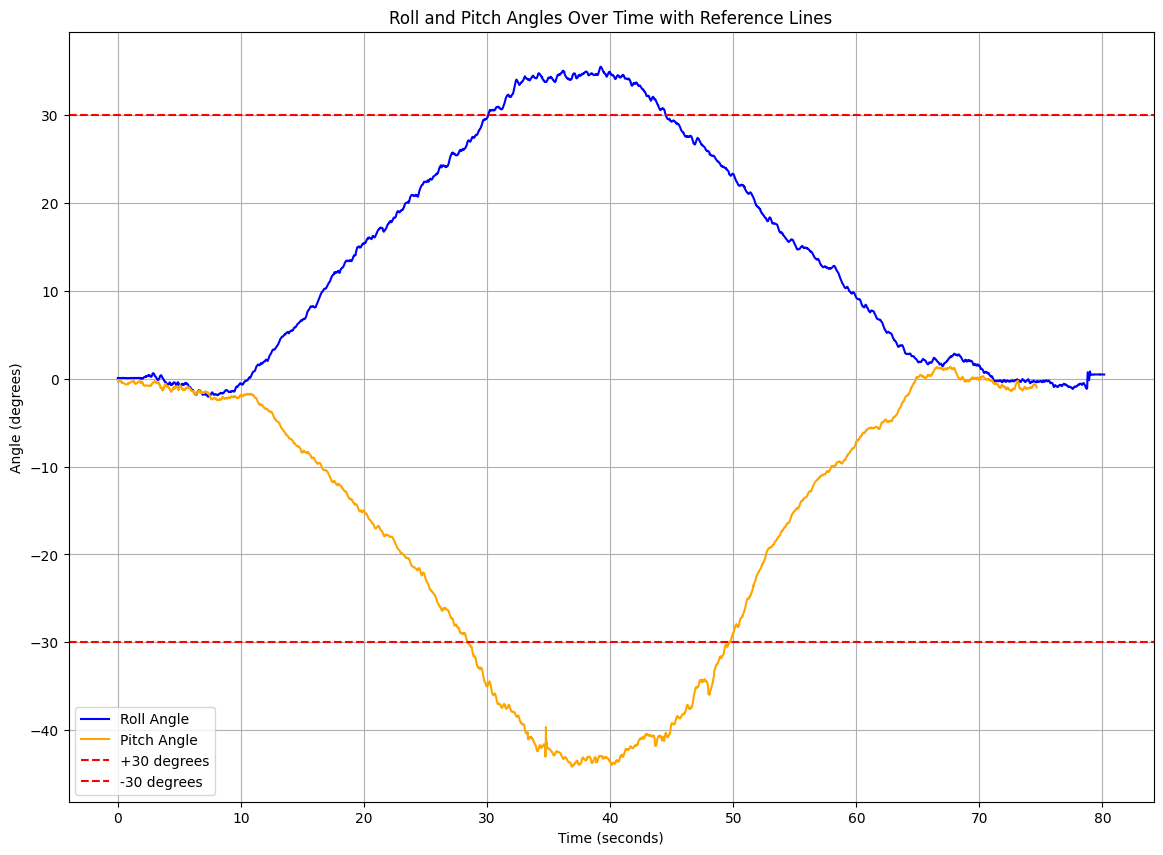

In [7]:
plt.figure(figsize=(14, 10))
plt.plot(roll_data['Time'], roll_data['Roll_deg'], label='Roll Angle', color='blue')
plt.plot(pitch3_data_cleaned['Time'], pitch3_data_cleaned['Pitch_deg'], label='Pitch Angle', color='orange')
plt.axhline(y=30, color='r', linestyle='--', label='+30 degrees')
plt.axhline(y=-30, color='r', linestyle='--', label='-30 degrees')
plt.title('Roll and Pitch Angles Over Time with Reference Lines')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()

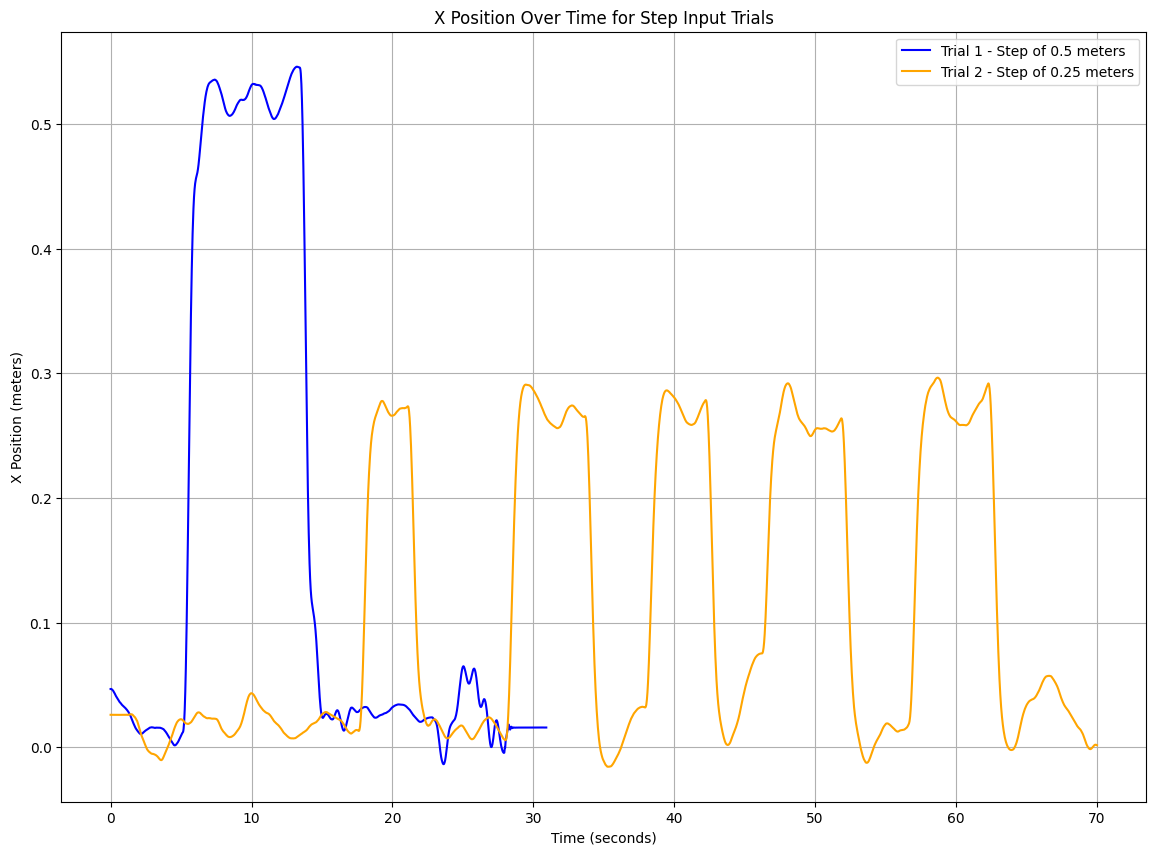

In [8]:
# Step analysis 

trans_step_data = pd.read_csv('trans_step_data.csv', header=None, names=column_names)

# Assuming each row corresponds to 1/50th of a second, create a time column for the first dataset
trans_step_data['Time'] = trans_step_data.index / 50  # Dataset was collected at 50 Hz
trans_step_data_filtered = trans_step_data[trans_step_data['Time'] <= 70]
trans2_step_data = pd.read_csv('trans2_step_data.csv', header=None, names=column_names)
trans2_step_data['Time'] = trans2_step_data.index / 50
trans2_step_data_filtered = trans2_step_data[trans2_step_data['Time'] <= 70]

# Plot X against time for both trials
plt.figure(figsize=(14, 10))
plt.plot(trans_step_data_filtered['Time'], trans_step_data_filtered['X'], label='Trial 1 - Step of 0.5 meters', color='blue')
plt.plot(trans2_step_data_filtered['Time'], trans2_step_data_filtered['X'], label='Trial 2 - Step of 0.25 meters', color='orange')
plt.title('X Position Over Time for Step Input Trials')
plt.xlabel('Time (seconds)')
plt.ylabel('X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()

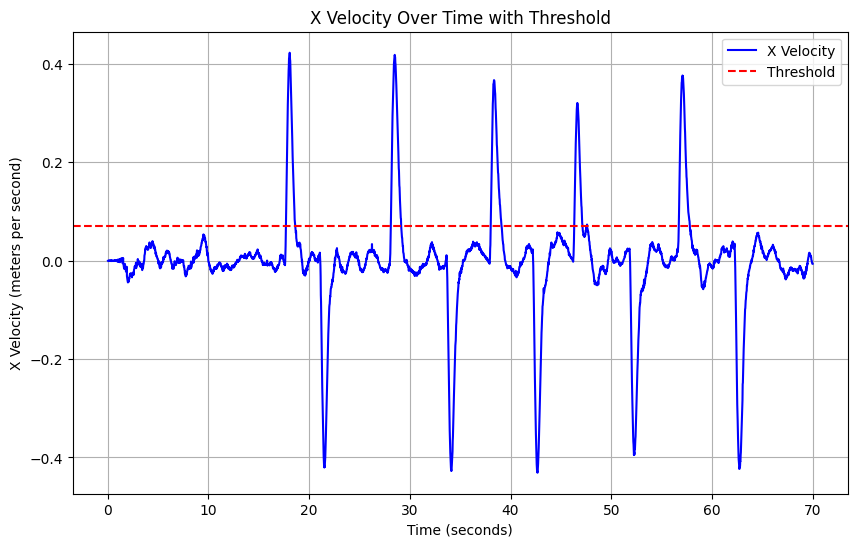

(0.06999999999999999, 12)

In [9]:
# Adjusting the approach to account for the nature of the step responses as curves
# This time, we aim for more than 10 intersections as a stop condition, indicating we've captured the 5 step inputs

# Reinitialize the starting threshold and conditions
threshold = 0.08
threshold_decrement = 0.005
intersections_found = 0
trans2_step_data['X_derivative'] = trans2_step_data['X'].diff() / trans2_step_data['Time'].diff()
trans2_step_data_filtered = trans2_step_data[trans2_step_data['Time'] <= 70]


# Reset analysis to start with the highest threshold and move downwards
while threshold > 0:
    # Count the number of times the derivative crosses the threshold, indicating intersections
    # This is done by checking where the derivative goes from below to above the threshold or vice versa
    crosses_threshold = ((trans2_step_data_filtered['X_derivative'] > threshold) & 
                         (trans2_step_data_filtered['X_derivative'].shift(1) < threshold)) | \
                        ((trans2_step_data_filtered['X_derivative'] < threshold) & 
                         (trans2_step_data_filtered['X_derivative'].shift(1) > threshold))
    
    intersections_found = crosses_threshold.sum()
    
    # Stop condition: If more than 10 intersections, we likely have captured the 5 steps
    if intersections_found > 10:
        break
    else:
        # If not, decrease the threshold and try again
        threshold -= threshold_decrement

# Plot the derivative with the final threshold line to visualize the intersections
plt.figure(figsize=(10, 6))
plt.plot(trans2_step_data_filtered['Time'], trans2_step_data_filtered['X_derivative'], label='X Velocity', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('X Velocity Over Time with Threshold')
plt.xlabel('Time (seconds)')
plt.ylabel('X Velocity (meters per second)')
plt.grid(True)
plt.legend()
plt.show()

threshold, intersections_found

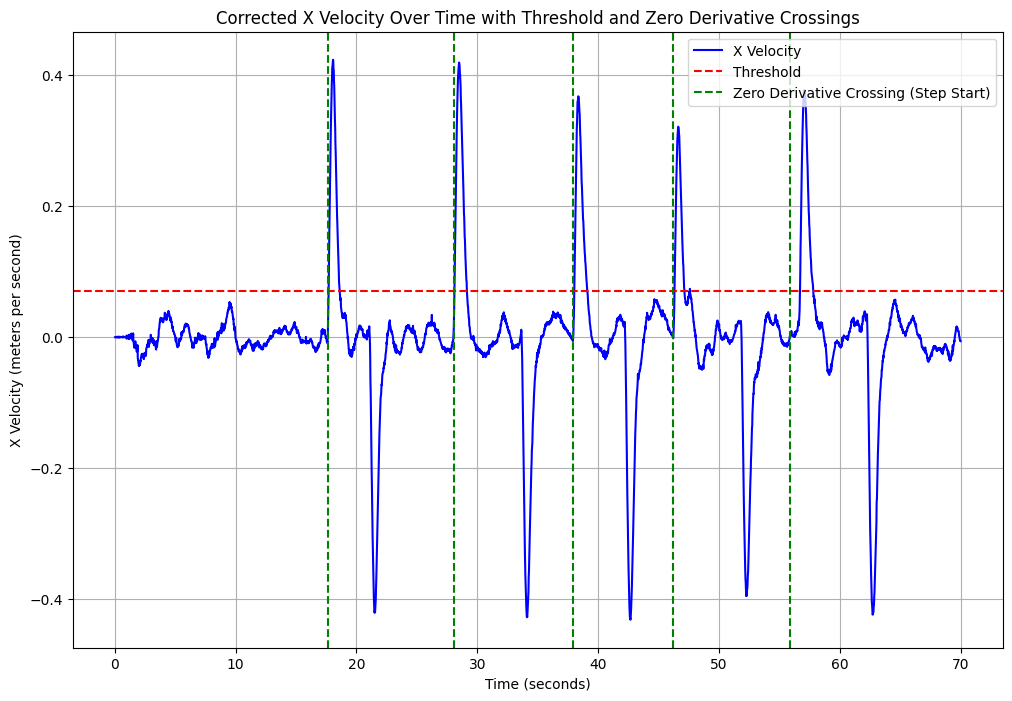

[17.64, 28.04, 37.96, 46.24, 55.88]

In [10]:
# Correcting the approach based on the new explanation
# Starting at each threshold crossing point, move back in time until the derivative crosses zero
cross_points = trans2_step_data_filtered[crosses_threshold]['Time']
# Initialize a list to store the corrected time points for when the derivative first crosses zero moving back from each threshold point
corrected_zero_derivative_times = []

for cross_time in cross_points:
    # Filter the dataset to consider only points before the current crossing point
    before_cross = trans2_step_data_filtered[trans2_step_data_filtered['Time'] <= cross_time]
    
    # Find the first point moving back in time where the derivative crosses zero
    zero_crossings = before_cross[before_cross['X_derivative'] * before_cross['X_derivative'].shift(1) < 0]
    
    if not zero_crossings.empty:
        zero_derivative_time = zero_crossings.iloc[-1]['Time']  # The last crossing point before the threshold crossing
        corrected_zero_derivative_times.append(zero_derivative_time)

# Remove potential duplicates due to very close zero crossings by converting to set and back to list
corrected_zero_derivative_times = list(set(corrected_zero_derivative_times))

# Sort the list to maintain chronological order
corrected_zero_derivative_times.sort()

# Plot the derivative graph again, this time highlighting the corrected zero derivative points
plt.figure(figsize=(12, 8))
plt.plot(trans2_step_data_filtered['Time'], trans2_step_data_filtered['X_derivative'], label='X Velocity', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Highlight corrected zero derivative points
for zero_time in corrected_zero_derivative_times:
    plt.axvline(x=zero_time, color='green', linestyle='--', label='Zero Derivative Crossing (Step Start)' if corrected_zero_derivative_times.index(zero_time) == 0 else "")

plt.title('Corrected X Velocity Over Time with Threshold and Zero Derivative Crossings')
plt.xlabel('Time (seconds)')
plt.ylabel('X Velocity (meters per second)')
plt.grid(True)
plt.legend()
plt.show()

corrected_zero_derivative_times


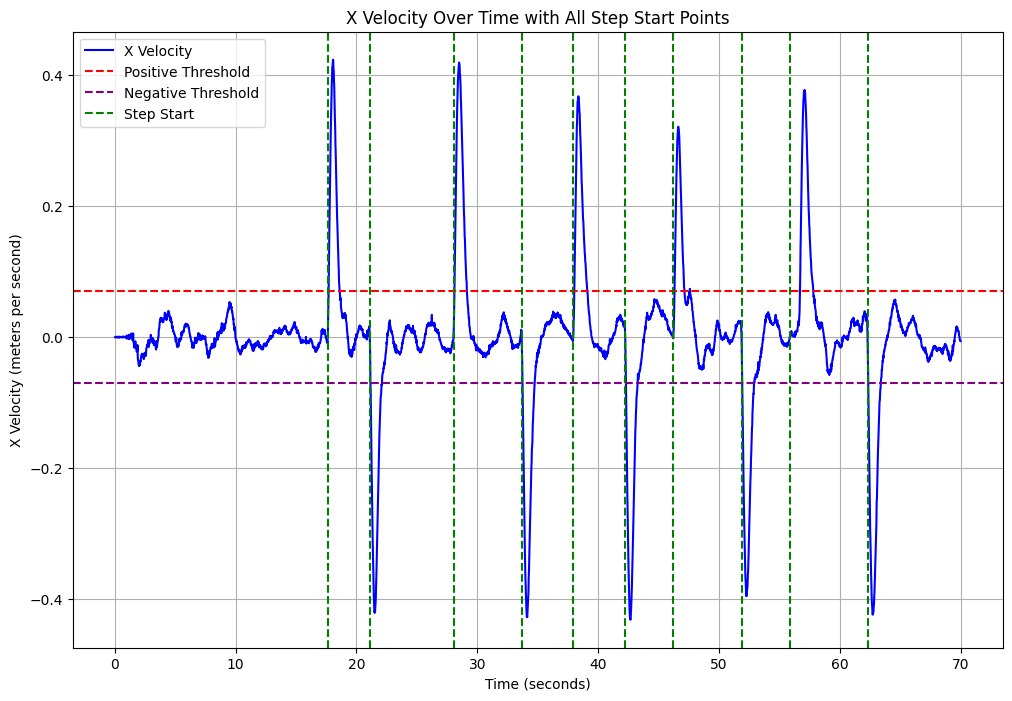

[17.64, 21.12, 28.04, 33.68, 37.96, 42.26, 46.24, 51.88, 55.88, 62.32]

In [11]:
# To find the starting points for all step commands, including those from 0.25 m back to 0 m,
# we will adjust our analysis to consider both positive and negative threshold crossings.

# Initialize a list to store the time points for both positive and negative step commands
all_step_start_times = []

# Define a function to find zero crossings for given conditions
def find_zero_crossings(data, threshold, direction='positive'):
    if direction == 'positive':
        crosses_threshold = ((data['X_derivative'] > threshold) & 
                             (data['X_derivative'].shift(1) <= threshold)) | \
                            ((data['X_derivative'] < -threshold) & 
                             (data['X_derivative'].shift(1) >= -threshold))
    else:
        crosses_threshold = ((data['X_derivative'] < threshold) & 
                             (data['X_derivative'].shift(1) >= threshold)) | \
                            ((data['X_derivative'] > -threshold) & 
                             (data['X_derivative'].shift(1) <= -threshold))
        
    cross_points = data[crosses_threshold]['Time']
    zero_crossings = []

    for cross_time in cross_points:
        # Filter the dataset to consider only points before the current crossing point
        before_cross = data[data['Time'] <= cross_time]

        # Find the first point moving back in time where the derivative crosses zero
        zero_cross_indices = before_cross.index[before_cross['X_derivative'] * before_cross['X_derivative'].shift(1) < 0]
        if not zero_cross_indices.empty:
            zero_derivative_time = before_cross.loc[zero_cross_indices[-1], 'Time']  # The last crossing point before the threshold crossing
            zero_crossings.append(zero_derivative_time)

    return zero_crossings

# Analyze for positive step commands (0 to 0.25 m)
positive_zero_crossings = find_zero_crossings(trans2_step_data_filtered, threshold, 'positive')
all_step_start_times.extend(positive_zero_crossings)

# Analyze for negative step commands (0.25 to 0 m)
negative_zero_crossings = find_zero_crossings(trans2_step_data_filtered, threshold, 'negative')
all_step_start_times.extend(negative_zero_crossings)

# Remove potential duplicates and sort the list to maintain chronological order
all_step_start_times = list(set(all_step_start_times))
all_step_start_times.sort()

# Plot the derivative graph again, highlighting all discovered points
plt.figure(figsize=(12, 8))
plt.plot(trans2_step_data_filtered['Time'], trans2_step_data_filtered['X_derivative'], label='X Velocity', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Positive Threshold')
plt.axhline(y=-threshold, color='purple', linestyle='--', label='Negative Threshold')

# Highlight all step start points
for start_time in all_step_start_times:
    plt.axvline(x=start_time, color='green', linestyle='--', label='Step Start' if all_step_start_times.index(start_time) == 0 else "")

plt.title('X Velocity Over Time with All Step Start Points')
plt.xlabel('Time (seconds)')
plt.ylabel('X Velocity (meters per second)')
plt.grid(True)
plt.legend()
plt.show()

all_step_start_times

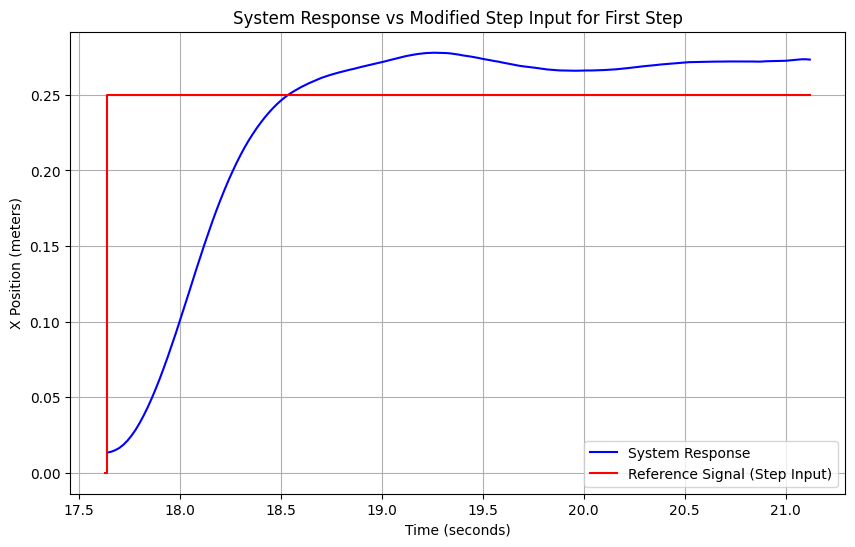

In [12]:
# For the very first step command, we use the first starting time from the list
first_step_time = all_step_start_times[0]

# Determine the observation duration based on the interval until the next step command
# This time, we'll ensure the reference signal remains at 0.25 m without dropping back down to 0
if len(all_step_start_times) > 1:
    observation_duration = all_step_start_times[1] - first_step_time
else:
    # Default to 3 seconds if we can't determine from the steps
    observation_duration = 3

# Define the start and end times for plotting
plot_start_time = first_step_time
plot_end_time = first_step_time + observation_duration

# Filter the dataset for the time period of interest for plotting
plot_data = trans2_step_data[(trans2_step_data['Time'] >= plot_start_time) & (trans2_step_data['Time'] <= plot_end_time)]

# Adjust the reference signal for the step input, creating a sideways L shape
ref_signal_time = [plot_start_time, plot_end_time]
ref_signal_x = [0.25, 0.25]  # Maintain at 0.25 meters

ref_signal_time_modified = [plot_start_time-0.01, plot_start_time, plot_end_time]  # Adding a small offset for the vertical line
ref_signal_x_modified = [0, 0.25, 0.25]  # Initial rise from 0 to 0.25 meters

# Re-plot the first step input's positional data along with the modified reference input
plt.figure(figsize=(10, 6))
plt.plot(plot_data['Time'], plot_data['X'], label='System Response', color='blue')
plt.step(ref_signal_time_modified, ref_signal_x_modified, label='Reference Signal (Step Input)', color='red', where='post')
plt.title('System Response vs Modified Step Input for First Step')
plt.xlabel('Time (seconds)')
plt.ylabel('X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()

[3.4800000000000004, 5.640000000000001, 4.299999999999997, 5.640000000000001, 5.689999999999998]


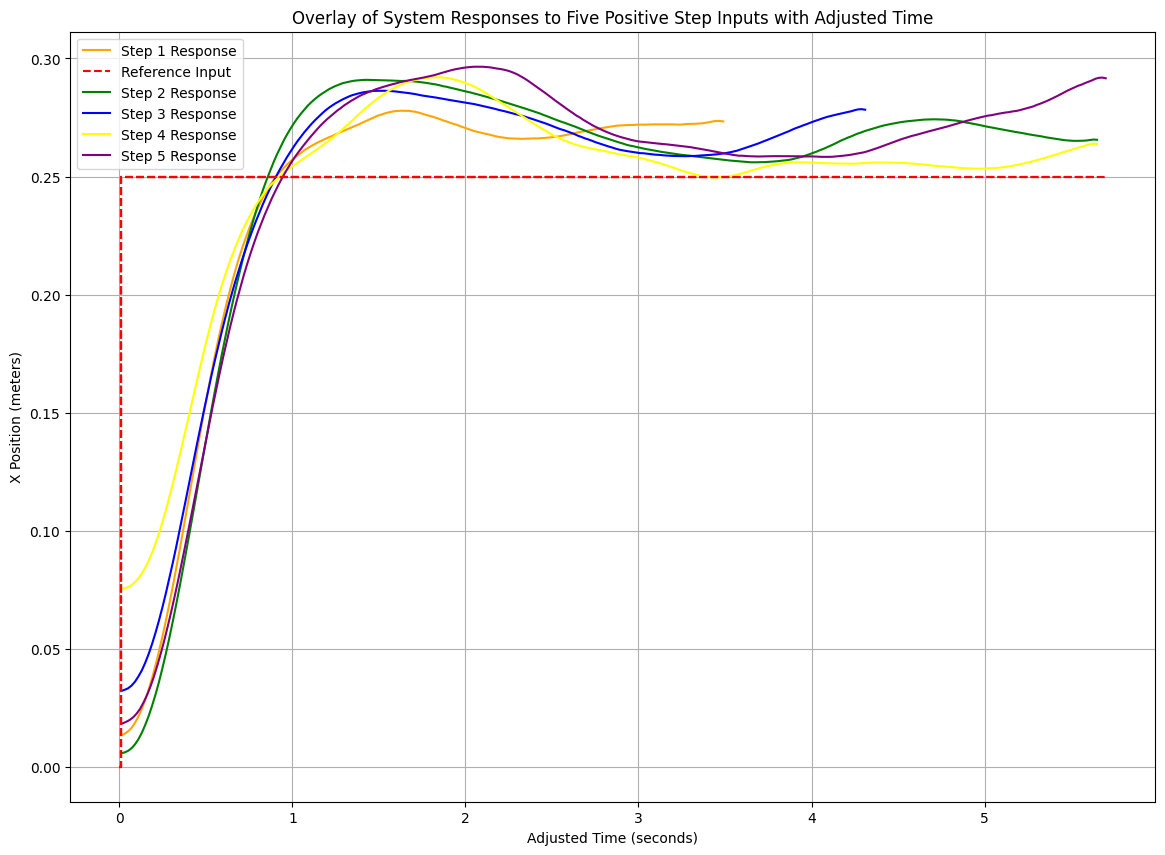

In [13]:
# Implementing the feedback correctly this time by alternating between positive and negative steps for accurate intervals.

plt.figure(figsize=(14, 10))

time_offset = 0.01

colors = ['orange', 'green', 'blue', 'yellow', 'purple']
# Calculate the interval for plotting based on the difference between the start of a positive step and the subsequent negative step
all_step_start_times[8] = all_step_start_times[8] + 0.75
intervals = [all_step_start_times[i + 1] - all_step_start_times[i] for i in range(0, 9, 2)]
print(intervals)
# Plot each positive step with its correctly calculated interval
for i, step_start_time in enumerate(all_step_start_times[::2]):  # Select every other time starting with the first, for positive steps
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]  # Use the last known interval for the last step if necessary
    
    # Adjust each step's time data to start from the new t=0.01
    plot_data = trans2_step_data[(trans2_step_data['Time'] >= step_start_time) & (trans2_step_data['Time'] <= step_start_time + observation_duration)]
    plot_data_adjusted = plot_data.copy()
    plot_data_adjusted['Time'] = plot_data['Time'] - step_start_time + time_offset  # Shift time to start near zero
    
    # Plot the adjusted system response for each step
    plt.plot(plot_data_adjusted['Time'], plot_data_adjusted['X'], label=f'Step {i+1} Response', color=colors[i])
    
    # Adjust the reference signal for the step input, creating a modified L shape with an initial rise
    ref_signal_time = [0, time_offset, time_offset + observation_duration]  # Start just before the new t=0 to show the rise
    ref_signal_x = [0, 0.25, 0.25]  # Maintain at 0.25 meters
    
    # Plot the reference signal
    plt.step(ref_signal_time, ref_signal_x, where='post', color='red', linestyle='--', label='Reference Input' if i == 0 else f"_nolegend_")

plt.title('Overlay of System Responses to Five Positive Step Inputs with Adjusted Time')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()

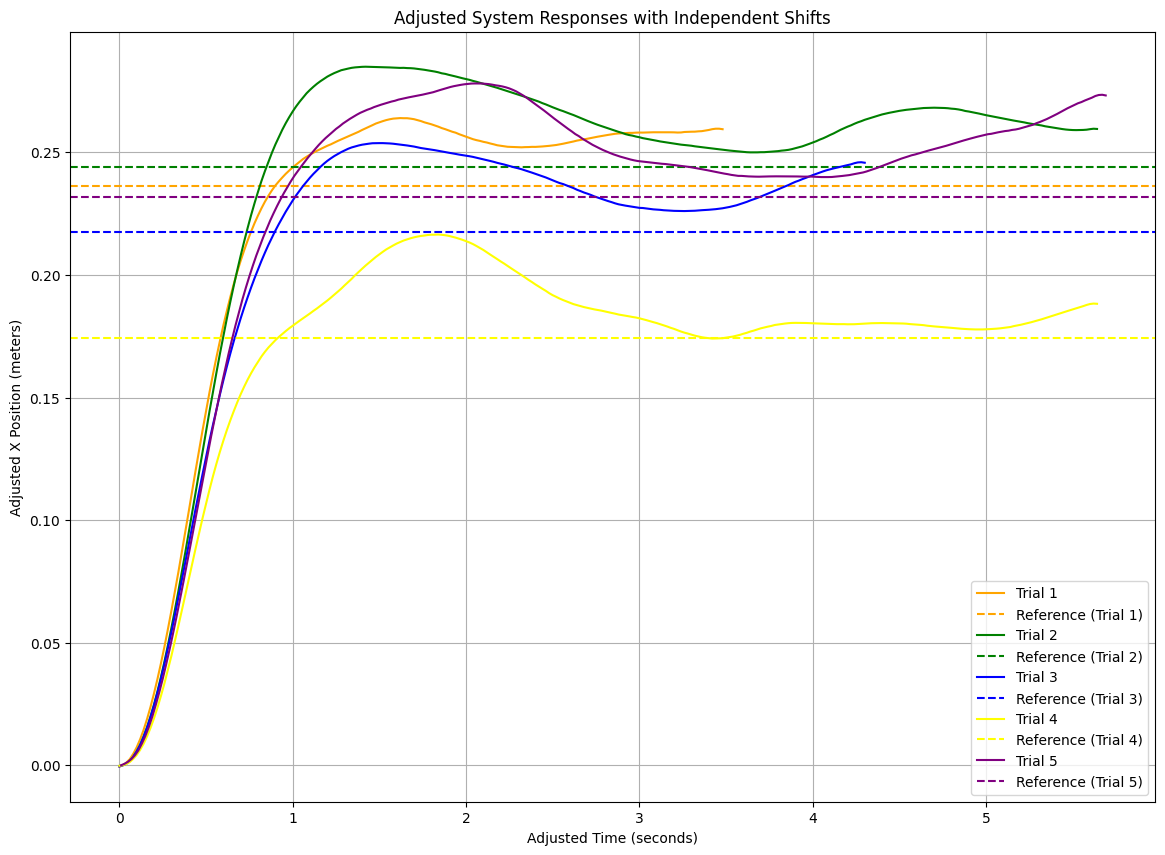

In [14]:
# Initialize a list to store adjusted datasets for each trial
adjusted_datasets = []
shifts = []
# Calculate and apply the shift for each trial
for i, step_start_time in enumerate(all_step_start_times[::2]):
    # Identify the trial data and its start point
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = trans2_step_data[(trans2_step_data['Time'] >= step_start_time) & 
                                  (trans2_step_data['Time'] <= step_start_time + observation_duration)]
    
    # Calculate the shift needed to start at X=0, using the first X position at or after t=0.01 seconds
    initial_x_at_001 = trial_data[trial_data['Time'] >= step_start_time + 0.01]['X'].iloc[0]
    shift = -initial_x_at_001
    shifts.append(shift)
    
    # Apply the shift
    adjusted_data = trial_data.copy()
    adjusted_data['X'] = adjusted_data['X'] + shift
    
    
    # Adjust the time to start from 0 for plotting
    adjusted_data['Adjusted Time'] = adjusted_data['Time'] - step_start_time
    
    adjusted_datasets.append(adjusted_data)

reference_input = 0.25
# Plot the adjusted X positions over time for each trial
plt.figure(figsize=(14, 10))
for i, adjusted_data in enumerate(adjusted_datasets):
    plt.plot(adjusted_data['Adjusted Time'], adjusted_data['X'], label=f'Trial {i+1}', color=colors[i])
    shifted_reference = reference_input + shifts[i]
    plt.axhline(y=shifted_reference, color=colors[i], linestyle='--', label=f'Reference (Trial {i+1})')
    

plt.title('Adjusted System Responses with Independent Shifts')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('Adjusted X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()


In [15]:
# Initialize an empty DataFrame with columns for common time and each trial
column_names = ['Common Time']
combined_data = pd.DataFrame(columns=column_names)

# Iterate over each trial and merge the data into the combined DataFrame
for i, step_start_time in enumerate(all_step_start_times[::2]):
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = trans2_step_data[(trans2_step_data['Time'] >= step_start_time) & 
                                  (trans2_step_data['Time'] <= step_start_time + observation_duration)]
    trial_data_adjusted = trial_data.copy()
    trial_data_adjusted['Common Time'] = trial_data['Time'] - step_start_time + time_offset
    
    # Merge the trial data into the combined DataFrame
    combined_data = pd.merge(combined_data, trial_data_adjusted[['Common Time', 'X']], on='Common Time', how='outer', sort=True)
    combined_data = combined_data.rename(columns={'X': f'Trial {i+1}'})

# Fill any missing values with NaN or interpolate if desired
combined_data = combined_data.fillna(method='ffill')

combined_data.head()

,Common Time,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.01,0.013313,0.005748,0.032060,0.075348,NaN
1,0.02,0.013313,0.005748,0.032060,0.075348,0.018417
2,0.03,0.013313,0.005748,0.032557,0.075569,0.018417
3,0.03,0.013908,0.006033,0.032557,0.075569,0.018417
4,0.04,0.013908,0.006033,0.032557,0.075569,0.019030


In [16]:
import control
step_info_list = []
x_values = combined_data['Trial 1'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=0.25)
step_info['Title'] = 'Step Analysis of Trial 1'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 2'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=0.25)
step_info['Title'] = 'Step Analysis of  Trial 2'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 3'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=0.25)
step_info['Title'] = 'Step Analysis of Trial 3'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 4'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=0.25)
step_info['Title'] = 'Step Analysis of  Trial 4'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 5'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=0.25)
step_info['Title'] = 'Step Analysis of Trial 5'
step_info_list.append(step_info)


{'RiseTime': 0.5999999999999979, 'SettlingTime': nan, 'SettlingMin': 0.2279230391544565, 'SettlingMax': 0.2778789086280821, 'Overshoot': 11.15156345123285, 'Undershoot': 0, 'Peak': 0.2778789086280821, 'PeakTime': 1.630000000000001, 'SteadyStateValue': 0.25, 'Title': 'Step Analysis of Trial 1'}
{'RiseTime': 0.5600000000000023, 'SettlingTime': nan, 'SettlingMin': 0.2251689107600032, 'SettlingMax': 0.2909534131974934, 'Overshoot': 16.38136527899736, 'Undershoot': 0, 'Peak': 0.2909534131974934, 'PeakTime': 1.4300000000000017, 'SteadyStateValue': 0.25, 'Title': 'Step Analysis of  Trial 2'}
{'RiseTime': 0.759999999999998, 'SettlingTime': nan, 'SettlingMin': 0.2274122560358652, 'SettlingMax': 0.2863160196207276, 'Overshoot': 14.526407848291045, 'Undershoot': 0, 'Peak': 0.2863160196207276, 'PeakTime': 1.51, 'SteadyStateValue': 0.25, 'Title': 'Step Analysis of Trial 3'}
{'RiseTime': 0.6999999999999957, 'SettlingTime': nan, 'SettlingMin': 0.2269044866068631, 'SettlingMax': 0.2920377627810025, 'O

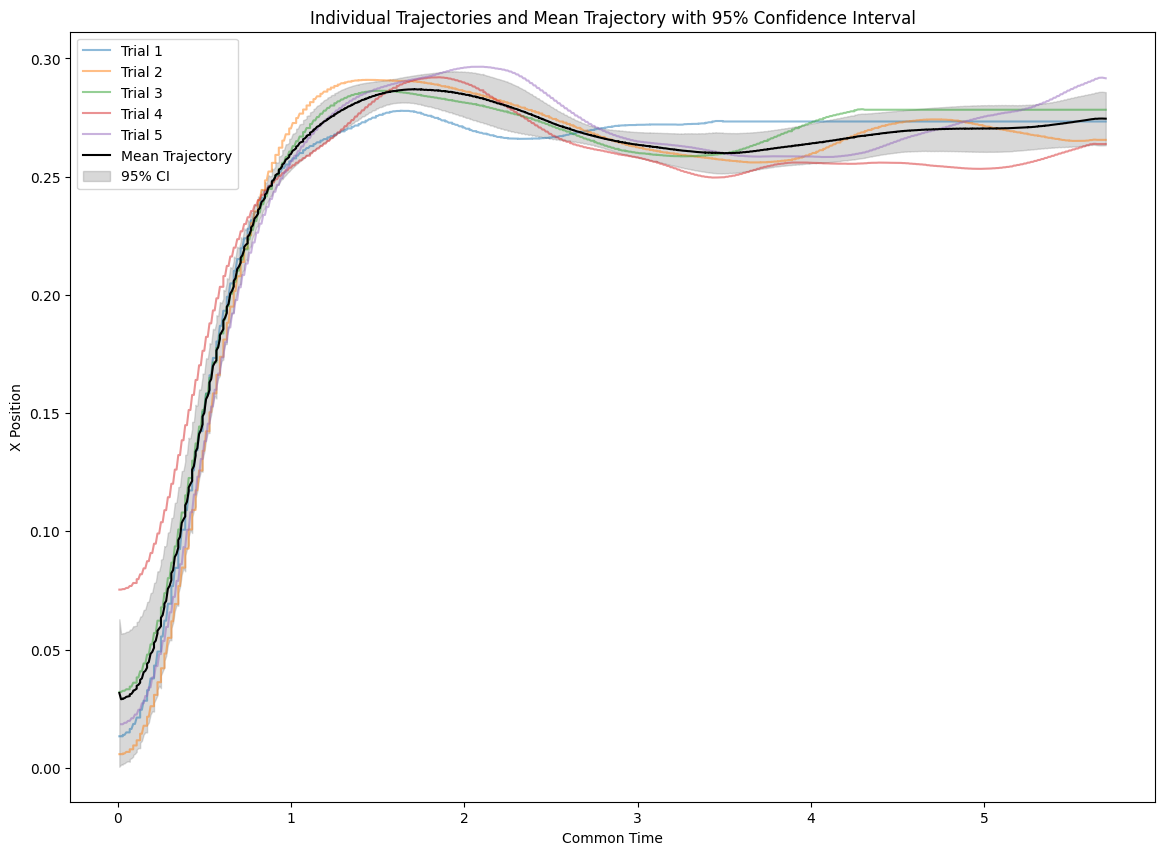

In [17]:
# Calculate the mean and standard deviation across trials at each time step
combined_data['Mean'] = combined_data[['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']].mean(axis=1)
combined_data['Std'] = combined_data[['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']].std(axis=1)

# Plot the individual trajectories
plt.figure(figsize=(14, 10))
for i in range(1, 6):
    plt.plot(combined_data['Common Time'], combined_data[f'Trial {i}'], label=f'Trial {i}', alpha=0.5)

# Plot the mean trajectory
plt.plot(combined_data['Common Time'], combined_data['Mean'], label='Mean Trajectory', color='black')

# Plot the confidence interval
plt.fill_between(combined_data['Common Time'], 
                 combined_data['Mean'] - combined_data['Std'], 
                 combined_data['Mean'] + combined_data['Std'], 
                 alpha=0.3, color='gray', label='95% CI')

plt.xlabel('Common Time')
plt.ylabel('X Position')
plt.title('Individual Trajectories and Mean Trajectory with 95% Confidence Interval')
plt.legend()
plt.show()


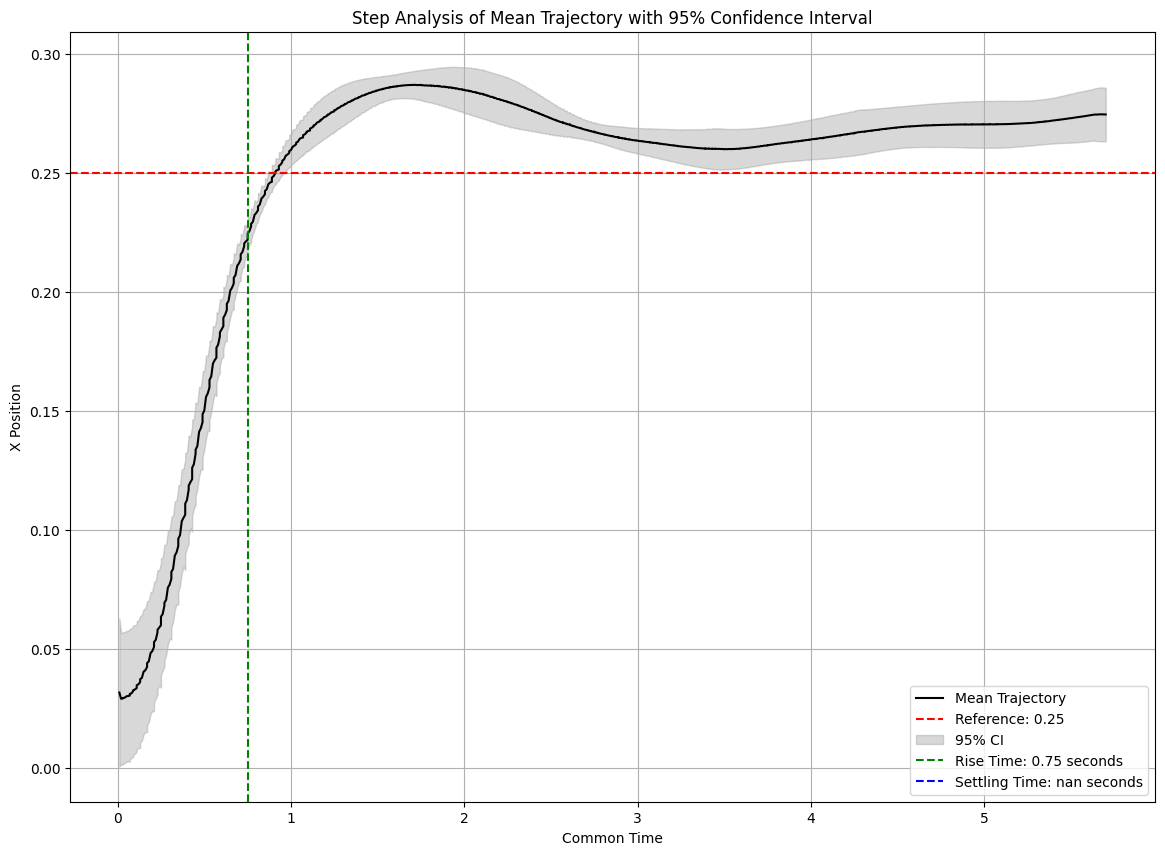

In [18]:


# Assuming 'combined_data' is your DataFrame with 'Mean' as the mean signal and 'Common Time' as the time vector
mean_signal = combined_data['Mean'].values  # The mean signal as a 1D numpy array
time = combined_data['Common Time'].values  # The corresponding time vector as a 1D numpy array

# Calculate step response characteristics for the mean signal, now providing both the signal and its time vector
step_info = control.step_info(mean_signal, T=time, SettlingTimeThreshold=0.05, yfinal=0.25)

# Plot the mean signal with annotations for rise time and settling time
plt.figure(figsize=(14, 10))
plt.plot(time, mean_signal, label='Mean Trajectory', color='black')
plt.axhline(y=0.25, color='red', linestyle='--', label='Reference: 0.25')
plt.fill_between(time, mean_signal - combined_data['Std'], mean_signal + combined_data['Std'], alpha=0.3, color='gray', label='95% CI')
plt.axvline(x=step_info['RiseTime'], color='green', linestyle='--', label=f'Rise Time: {step_info["RiseTime"]:.2f} seconds')
plt.axvline(x=step_info['SettlingTime'], color='blue', linestyle='--', label=f'Settling Time: {step_info["SettlingTime"]:.2f} seconds')
plt.xlabel('Common Time')
plt.ylabel('X Position')
plt.title('Step Analysis of Mean Trajectory with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


# Scenario 1: Mean Trajectory
step_info['Title'] = 'Step Analysis of Mean Trajectory with 95% Confidence Interval'
step_info_list.append(step_info)


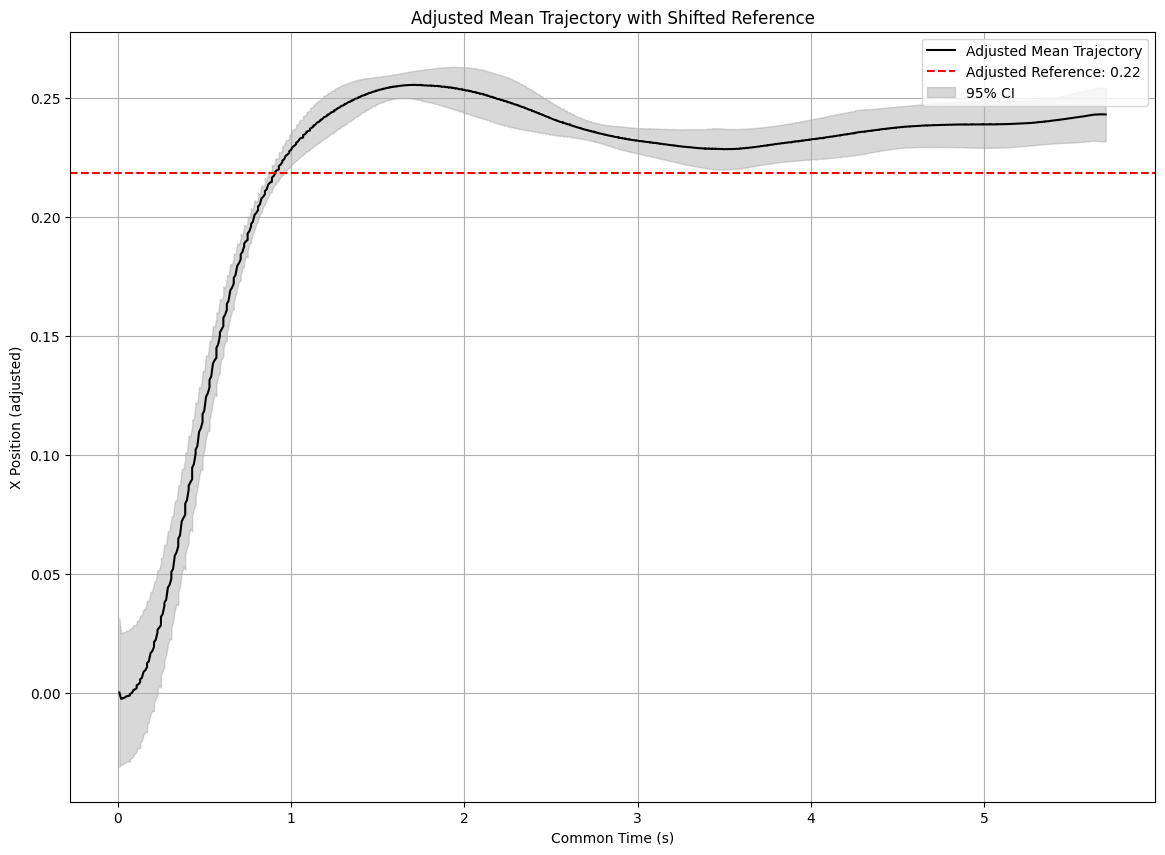

In [19]:
# Calculate the shift needed to start the mean trajectory at zero
shift_value = combined_data['Mean'].iloc[0]

# Apply the shift to the mean trajectory
shifted_mean_signal = combined_data['Mean'] - shift_value

# Adjust the reference of 0.25 by the shift value
adjusted_reference = 0.25 - shift_value


# Plotting
plt.figure(figsize=(14, 10))
plt.plot(time, shifted_mean_signal, label='Adjusted Mean Trajectory', color='black')
plt.axhline(y=adjusted_reference, color='red', linestyle='--', label=f'Adjusted Reference: {adjusted_reference:.2f}')

# Optionally, if you have the standard deviation for the 95% CI
std_dev = combined_data['Std']  # Assuming this exists
plt.fill_between(time, shifted_mean_signal - std_dev, shifted_mean_signal + std_dev, alpha=0.3, color='gray', label='95% CI')

plt.xlabel('Common Time (s)')
plt.ylabel('X Position (adjusted)')
plt.title('Adjusted Mean Trajectory with Shifted Reference')
plt.legend()
plt.grid(True)
plt.show()

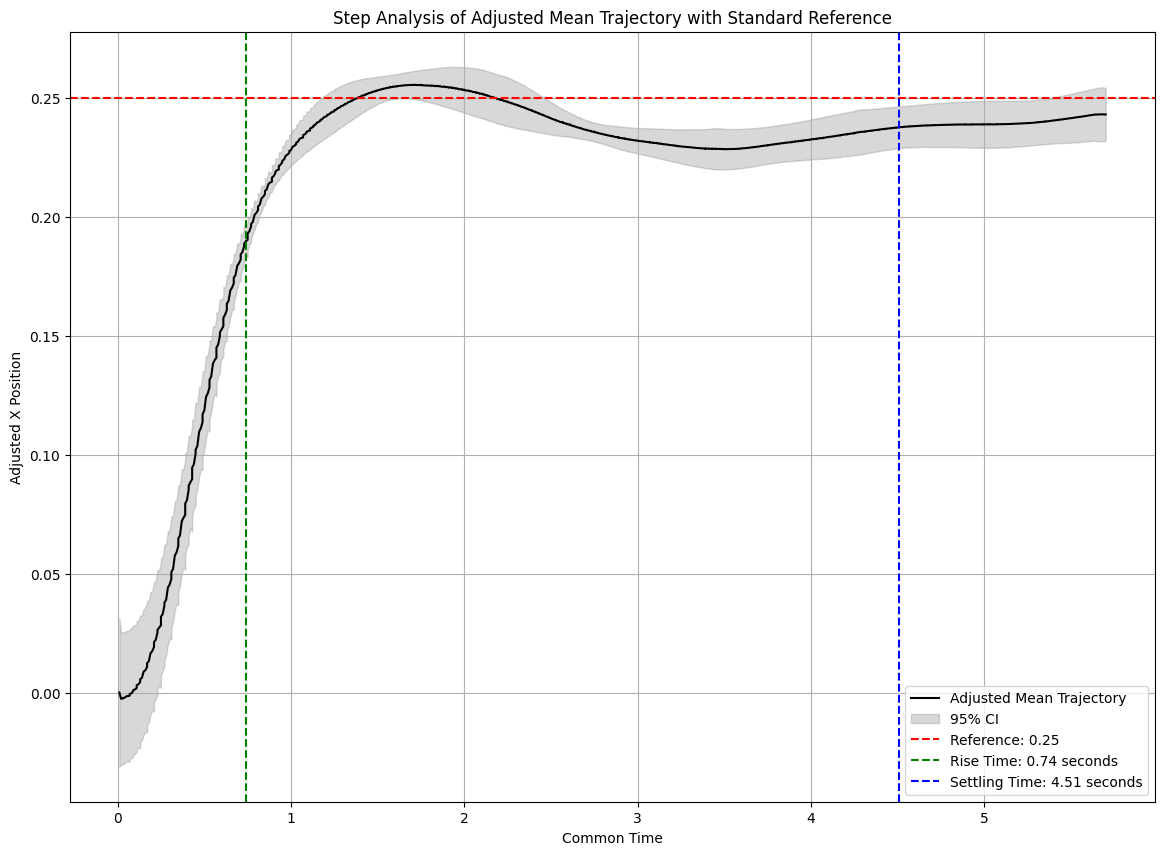

In [20]:
# Assuming 'combined_data' DataFrame has 'Common Time' as the time vector
time = combined_data['Common Time'].values  # The corresponding time vector as a 1D numpy array

# Calculate step response characteristics for the shifted mean signal, now providing both the signal and its time vector
# Note: yfinal is adjusted to match the shifted reference
step_info = control.step_info(shifted_mean_signal.values, T=time, SettlingTimeThreshold=0.05, yfinal=0.25)

step_info['Title'] = 'Step Analysis of Adjusted Mean Trajectory with Standard Reference'
step_info_list.append(step_info)

# Plot the shifted mean signal with annotations for rise time and settling time
plt.figure(figsize=(14, 10))
plt.plot(time, shifted_mean_signal, label='Adjusted Mean Trajectory', color='black')
plt.fill_between(time, shifted_mean_signal - combined_data['Std'], shifted_mean_signal + combined_data['Std'], alpha=0.3, color='gray', label='95% CI')
plt.axhline(y=0.25, color='red', linestyle='--', label=f'Reference: 0.25')
plt.axvline(x=step_info['RiseTime'], color='green', linestyle='--', label=f'Rise Time: {step_info["RiseTime"]:.2f} seconds')
plt.axvline(x=step_info['SettlingTime'], color='blue', linestyle='--', label=f'Settling Time: {step_info["SettlingTime"]:.2f} seconds')
plt.xlabel('Common Time')
plt.ylabel('Adjusted X Position')
plt.title('Step Analysis of Adjusted Mean Trajectory with Standard Reference')
plt.legend()
plt.grid(True)
plt.show()

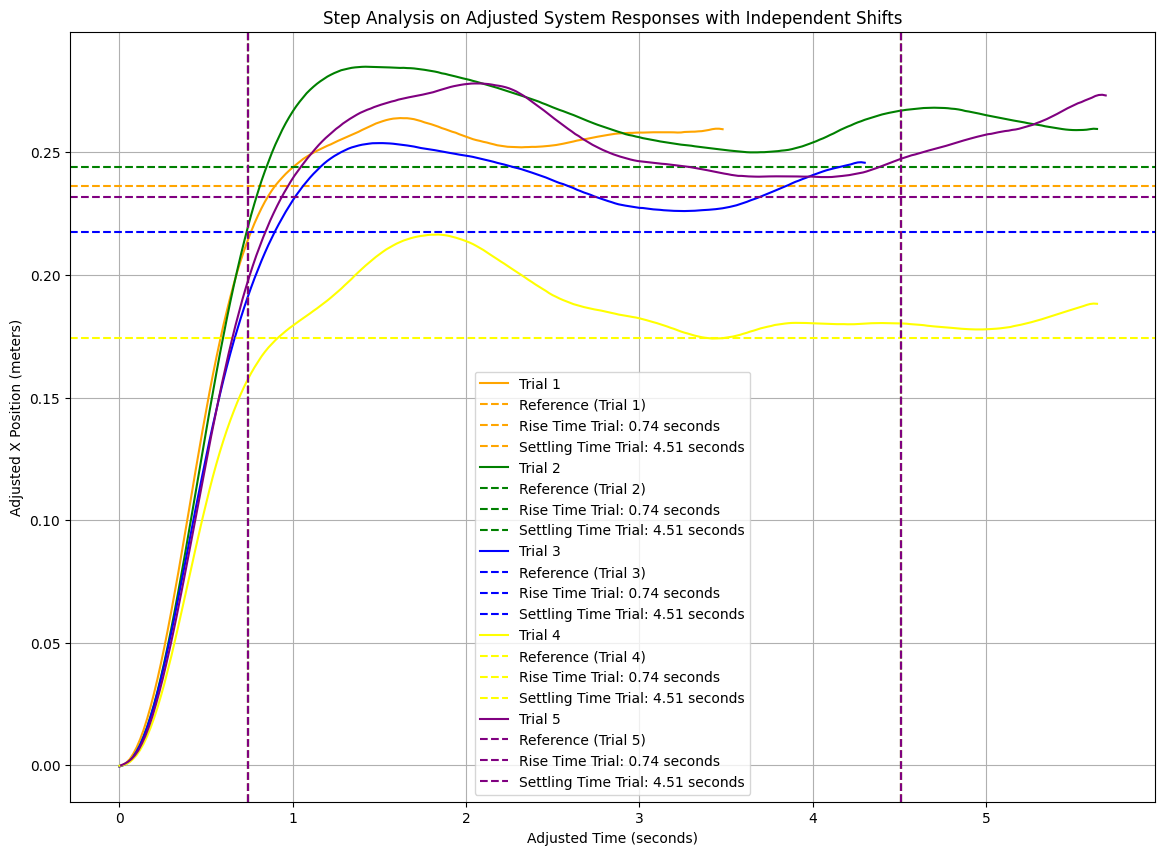

In [21]:
# Initialize a list to store adjusted datasets for each trial
adjusted_datasets = []
shifts = []
# Calculate and apply the shift for each trial
for i, step_start_time in enumerate(all_step_start_times[::2]):
    # Identify the trial data and its start point
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = trans2_step_data[(trans2_step_data['Time'] >= step_start_time) & 
                                  (trans2_step_data['Time'] <= step_start_time + observation_duration)]
    
    # Calculate the shift needed to start at X=0, using the first X position at or after t=0.01 seconds
    initial_x_at_001 = trial_data[trial_data['Time'] >= step_start_time + 0.01]['X'].iloc[0]
    shift = -initial_x_at_001
    shifts.append(shift)
    
    # Apply the shift
    adjusted_data = trial_data.copy()
    adjusted_data['X'] = adjusted_data['X'] + shift
    
    
    # Adjust the time to start from 0 for plotting
    adjusted_data['Adjusted Time'] = adjusted_data['Time'] - step_start_time
    
    adjusted_datasets.append(adjusted_data)

reference_input = 0.25
# Plot the adjusted X positions over time for each trial
plt.figure(figsize=(14, 10))
for i, adjusted_data in enumerate(adjusted_datasets):
    plt.plot(adjusted_data['Adjusted Time'], adjusted_data['X'], label=f'Trial {i+1}', color=colors[i])
    shifted_reference = reference_input + shifts[i]
    plt.axhline(y=shifted_reference, color=colors[i], linestyle='--', label=f'Reference (Trial {i+1})')
    # Convert the Series to numpy arrays before passing them to control.step_info
    x_values = adjusted_data['X'].to_numpy()
    time_values = adjusted_data['Adjusted Time'].to_numpy()
    # Now call control.step_info with numpy arrays
    plt.axvline(x=step_info['RiseTime'], color=colors[i], linestyle='--', label=f'Rise Time Trial: {step_info["RiseTime"]:.2f} seconds')
    plt.axvline(x=step_info['SettlingTime'], color=colors[i], linestyle='--', label=f'Settling Time Trial: {step_info["SettlingTime"]:.2f} seconds')
    

plt.title('Step Analysis on Adjusted System Responses with Independent Shifts')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('Adjusted X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()


In [22]:
# Convert the list of step info dictionaries into a DataFrame
step_info_df = pd.DataFrame(step_info_list)

# Select and rename the columns we are interested in
step_info_df = step_info_df[['Title', 'RiseTime', 'SettlingTime']]

# Display the DataFrame
step_info_df

latex_table = step_info_df.to_latex(index=False, float_format="%.2f")

print(latex_table)

\begin{tabular}{lrr}
\toprule
Title & RiseTime & SettlingTime \\
\midrule
Step Analysis of Trial 1 & 0.60 & NaN \\
Step Analysis of  Trial 2 & 0.56 & NaN \\
Step Analysis of Trial 3 & 0.76 & NaN \\
Step Analysis of  Trial 4 & 0.70 & NaN \\
Step Analysis of Trial 5 & 0.66 & NaN \\
Step Analysis of Mean Trajectory with 95% Confidence Interval & 0.75 & NaN \\
Step Analysis of Adjusted Mean Trajectory with Standard Reference & 0.74 & 4.51 \\
\bottomrule
\end{tabular}



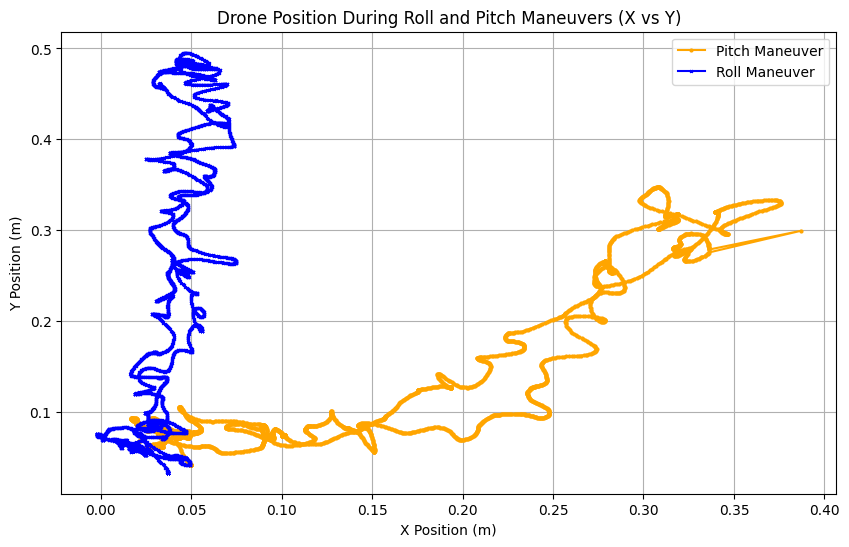

In [23]:
# Assuming pitch3_data and roll_data are loaded successfully with headers
plt.figure(figsize=(10, 6))

# Plot X vs Y for the pitch3 trial
plt.plot(pitch3_data['X'], pitch3_data['Y'], color='orange', label='Pitch Maneuver', marker='o', linestyle='-', markersize=2)

# Plot X vs Y for the roll trial
plt.plot(roll_data['X'], roll_data['Y'], color='blue', label='Roll Maneuver', marker='x', linestyle='-', markersize=2)

plt.title('Drone Position During Roll and Pitch Maneuvers (X vs Y)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid(True)
plt.show()


             X         Y         Z      Roll     Pitch       Yaw
0     0.008719  0.084935  0.714485 -0.016052 -0.035853 -0.234267
1     0.008803  0.084750  0.714421 -0.016430 -0.035282 -0.234675
2     0.008898  0.084545  0.714397 -0.016484 -0.035320 -0.234757
3     0.009005  0.084325  0.714380 -0.016495 -0.035227 -0.234886
4     0.009046  0.084136  0.714361 -0.016239 -0.035043 -0.235100
...        ...       ...       ...       ...       ...       ...
5200  0.013403  0.114858  0.168461 -0.003118 -0.031100 -0.163033
5201  0.013601  0.116091  0.169325 -0.003249 -0.029588 -0.163059
5202  0.013525  0.116592  0.167857 -0.002136 -0.023815 -0.163901
5203  0.013608  0.115704  0.164825  0.004680 -0.020487 -0.164633
5204  0.013803  0.113825  0.161484  0.008538 -0.019310 -0.166223

[5205 rows x 6 columns]


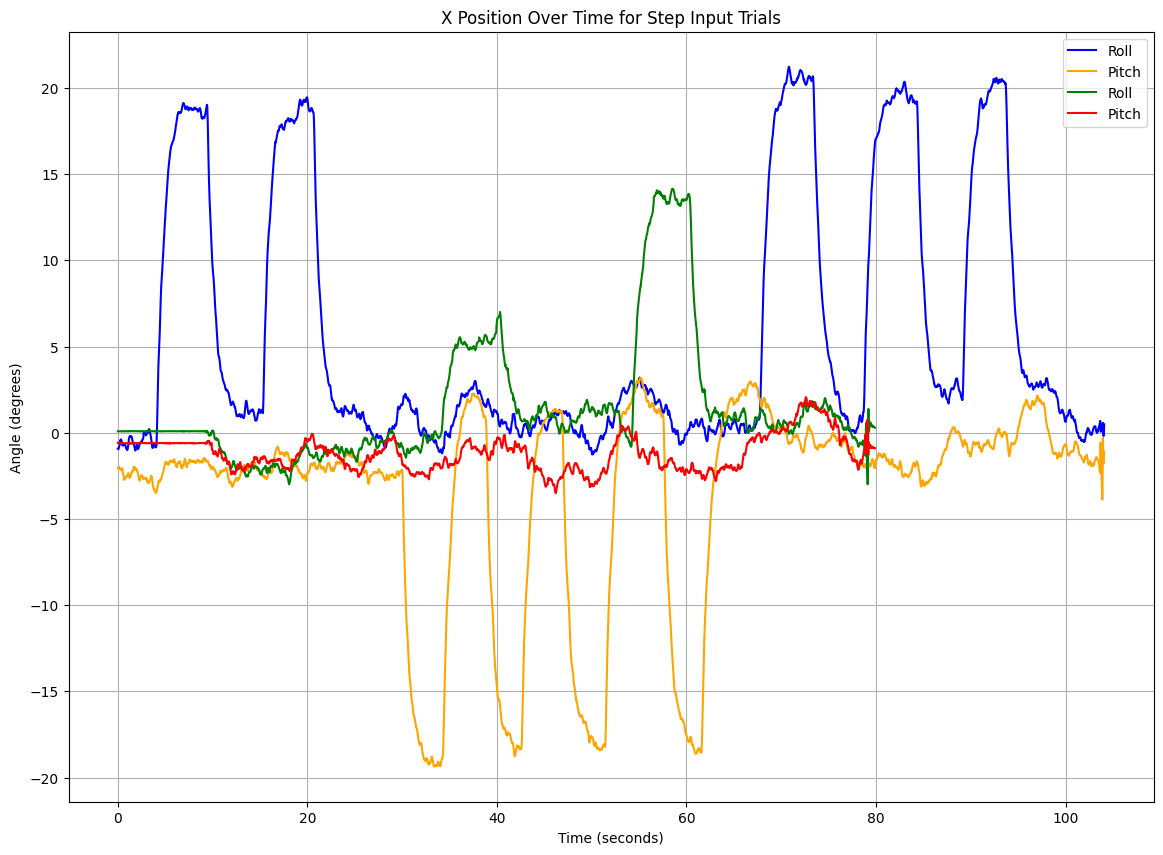

In [24]:
# Load the data
column_names = ['X', 'Y', 'Z', 'Roll', 'Pitch', 'Yaw']
roll2_step_data = pd.read_csv('roll2_step_data.csv', header=None, names=column_names)
roll_step_data = pd.read_csv('roll_step_data.csv', header=None, names=column_names)
print(roll2_step_data)

# Assume a publish_rate of 50 Hz is correct
publish_rate = 50

# Convert Pitch from radians to degrees for consistency
roll2_step_data['Pitch_deg'] = np.degrees(roll2_step_data['Pitch'])
roll2_step_data['Roll_deg'] = np.degrees(roll2_step_data['Roll'])
roll2_step_data['Yaw_deg'] = np.degrees(roll2_step_data['Yaw'])
roll2_step_data['Time'] = roll2_step_data.index / 50 
# Assuming each row corresponds to 1/50th of a second, create a time column for the first dataset
roll2_step_data['Time'] = roll2_step_data.index / 50  # Dataset was collected at 50 Hz
#roll2_step_data_filtered = roll2_step_data[roll2_step_data['Time'] <= 70]

# Convert Pitch from radians to degrees for consistency
roll_step_data['Pitch_deg'] = np.degrees(roll_step_data['Pitch'])
roll_step_data['Roll_deg'] = np.degrees(roll_step_data['Roll'])
roll_step_data['Yaw_deg'] = np.degrees(roll_step_data['Yaw'])
roll_step_data['Time'] = roll_step_data.index / 50 
# Assuming each row corresponds to 1/50th of a second, create a time column for the first dataset
roll_step_data['Time'] = roll_step_data.index / 50  # Dataset was collected at 50 Hz
#roll2_step_data_filtered = roll2_step_data[roll2_step_data['Time'] <= 70]


# Plot X against time for both trials
plt.figure(figsize=(14, 10))
plt.plot(roll2_step_data['Time'], roll2_step_data['Roll_deg'], label='Roll', color='blue')
plt.plot(roll2_step_data['Time'], roll2_step_data['Pitch_deg'], label='Pitch', color='orange')
plt.plot(roll_step_data['Time'], roll_step_data['Roll_deg'], label='Roll', color='green')
plt.plot(roll_step_data['Time'], roll_step_data['Pitch_deg'], label='Pitch', color='red')
plt.title('X Position Over Time for Step Input Trials')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()


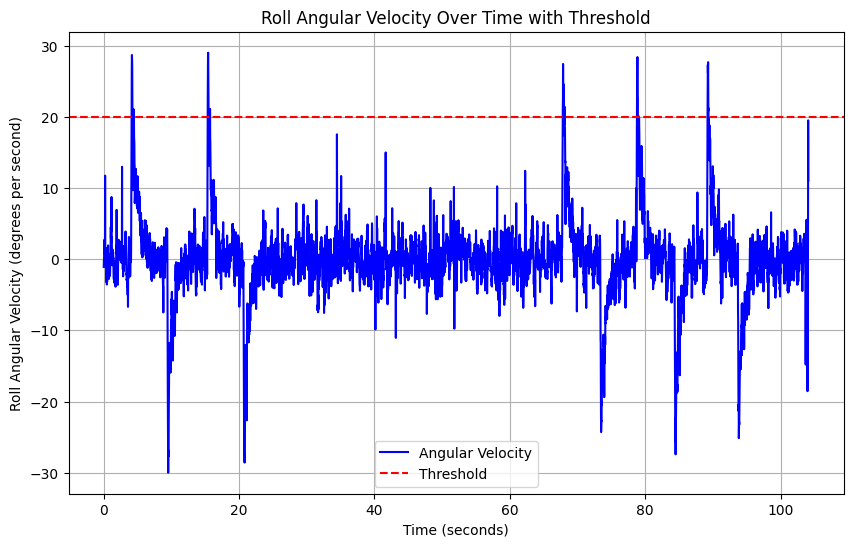

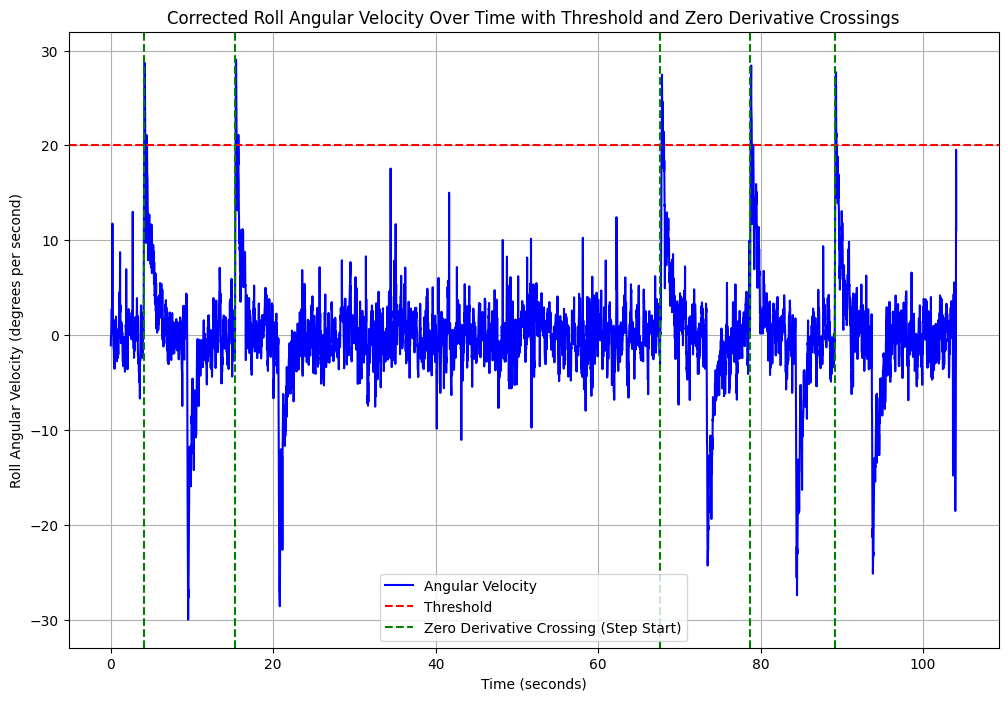

[4.06, 15.32, 67.64, 78.7, 89.14]

In [25]:
threshold = 20
threshold_decrement = 0.005
intersections_found = 0
roll2_step_data['Roll_derivative'] = roll2_step_data['Roll_deg'].diff() / roll2_step_data['Time'].diff()

# Reset analysis to start with the highest threshold and move downwards
while threshold > 0:
    # Count the number of times the derivative crosses the threshold, indicating intersections
    # This is done by checking where the derivative goes from below to above the threshold or vice versa
    crosses_threshold = ((roll2_step_data['Roll_derivative'] > threshold) & 
                         (roll2_step_data['Roll_derivative'].shift(1) < threshold)) | \
                        ((roll2_step_data['Roll_derivative'] < threshold) & 
                         (roll2_step_data['Roll_derivative'].shift(1) > threshold))
    
    intersections_found = crosses_threshold.sum()
    
    # Stop condition: If more than 10 intersections, we likely have captured the 5 steps
    if intersections_found > 10:
        break
    else:
        # If not, decrease the threshold and try again
        threshold -= threshold_decrement

# Plot the derivative with the final threshold line to visualize the intersections
plt.figure(figsize=(10, 6))
plt.plot(roll2_step_data['Time'], roll2_step_data['Roll_derivative'], label='Angular Velocity', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Roll Angular Velocity Over Time with Threshold')
plt.xlabel('Time (seconds)')
plt.ylabel('Roll Angular Velocity (degrees per second)')
plt.grid(True)
plt.legend()
plt.show()

threshold, intersections_found

# Correcting the approach based on the new explanation
# Starting at each threshold crossing point, move back in time until the derivative crosses zero
cross_points = roll2_step_data[crosses_threshold]['Time']
# Initialize a list to store the corrected time points for when the derivative first crosses zero moving back from each threshold point
corrected_zero_derivative_times = []

for cross_time in cross_points:
    # Filter the dataset to consider only points before the current crossing point
    before_cross = roll2_step_data[roll2_step_data['Time'] <= cross_time]
    
    # Find the first point moving back in time where the derivative crosses zero
    zero_crossings = before_cross[before_cross['Roll_derivative'] * before_cross['Roll_derivative'].shift(1) < 0]
    
    if not zero_crossings.empty:
        zero_derivative_time = zero_crossings.iloc[-1]['Time']  # The last crossing point before the threshold crossing
        corrected_zero_derivative_times.append(zero_derivative_time)

# Remove potential duplicates due to very close zero crossings by converting to set and back to list
corrected_zero_derivative_times = list(set(corrected_zero_derivative_times))

# Sort the list to maintain chronological order
corrected_zero_derivative_times.sort()

# Plot the derivative graph again, this time highlighting the corrected zero derivative points
plt.figure(figsize=(12, 8))
plt.plot(roll2_step_data['Time'], roll2_step_data['Roll_derivative'], label='Angular Velocity', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Highlight corrected zero derivative points
for zero_time in corrected_zero_derivative_times:
    plt.axvline(x=zero_time, color='green', linestyle='--', label='Zero Derivative Crossing (Step Start)' if corrected_zero_derivative_times.index(zero_time) == 0 else "")

plt.title('Corrected Roll Angular Velocity Over Time with Threshold and Zero Derivative Crossings')
plt.xlabel('Time (seconds)')
plt.ylabel('Roll Angular Velocity (degrees per second)')
plt.grid(True)
plt.legend()
plt.show()

corrected_zero_derivative_times


In [26]:
# To find the starting points for all step commands, including those from 0.25 m back to 0 m,
# we will adjust our analysis to consider both positive and negative threshold crossings.

# Initialize a list to store the time points for both positive and negative step commands
all_step_start_times = []

# Define a function to find zero crossings for given conditions
def find_zero_crossings(data, threshold, direction='positive'):
    if direction == 'positive':
        crosses_threshold = ((data['Roll_derivative'] > threshold) & 
                             (data['Roll_derivative'].shift(1) <= threshold)) | \
                            ((data['Roll_derivative'] < -threshold) & 
                             (data['Roll_derivative'].shift(1) >= -threshold))
    else:
        crosses_threshold = ((data['Roll_derivative'] < threshold) & 
                             (data['Roll_derivative'].shift(1) >= threshold)) | \
                            ((data['Roll_derivative'] > -threshold) & 
                             (data['Roll_derivative'].shift(1) <= -threshold))
        
    cross_points = data[crosses_threshold]['Time']
    zero_crossings = []

    for cross_time in cross_points:
        # Filter the dataset to consider only points before the current crossing point
        before_cross = data[data['Time'] <= cross_time]

        # Find the first point moving back in time where the derivative crosses zero
        zero_cross_indices = before_cross.index[before_cross['Roll_derivative'] * before_cross['Roll_derivative'].shift(1) < 0]
        if not zero_cross_indices.empty:
            zero_derivative_time = before_cross.loc[zero_cross_indices[-1], 'Time']  # The last crossing point before the threshold crossing
            zero_crossings.append(zero_derivative_time)

    return zero_crossings

# Analyze for positive step commands (0 to 0.25 m)
positive_zero_crossings = find_zero_crossings(roll2_step_data, threshold, 'positive')
all_step_start_times.extend(positive_zero_crossings)

# Analyze for negative step commands (0.25 to 0 m)
negative_zero_crossings = find_zero_crossings(roll2_step_data, threshold, 'negative')
all_step_start_times.extend(negative_zero_crossings)

# Remove potential duplicates and sort the list to maintain chronological order
all_step_start_times = list(set(all_step_start_times))
all_step_start_times.sort()


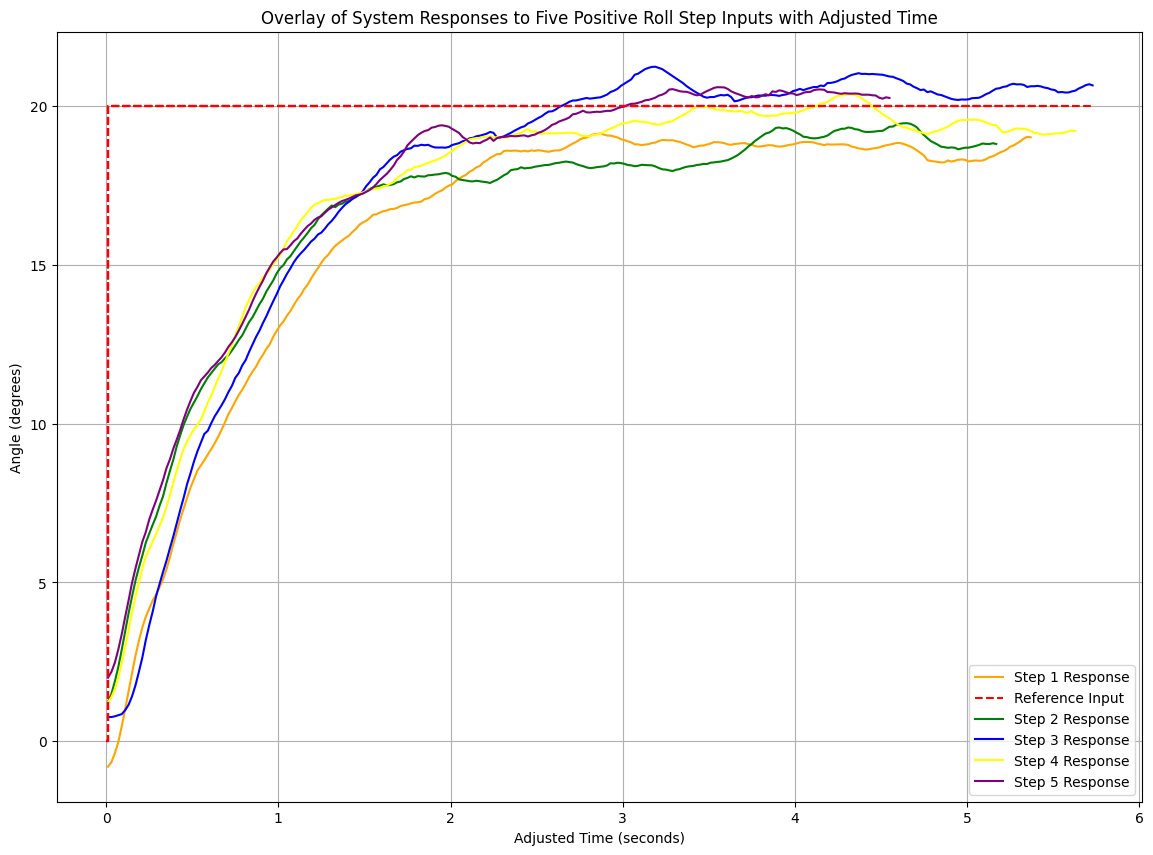

In [27]:
plt.figure(figsize=(14, 10))

time_offset = 0.01

# Calculate the interval for plotting based on the difference between the start of a positive step and the subsequent negative step
intervals = [all_step_start_times[i + 1] - all_step_start_times[i] for i in range(0, 9, 2)]

# Plot each positive step with its correctly calculated interval
for i, step_start_time in enumerate(all_step_start_times[::2]):# Select every other time starting with the first, for positive steps
    # Calculate observation duration but limit it to 12 seconds
    if i < len(intervals):
        observation_duration = min(intervals[i], 12)  # Limit to 12 seconds
    else:
        # For the last step, if intervals are not defined, default to a max of 12 seconds
        observation_duration = 12
    
    # Adjust each step's time data to start from the new t=0.01
    plot_data = roll2_step_data[(roll2_step_data['Time'] >= step_start_time) & (roll2_step_data['Time'] <= step_start_time + observation_duration)]
    plot_data_adjusted = plot_data.copy()
    plot_data_adjusted['Time'] = plot_data['Time'] - step_start_time + time_offset  # Shift time to start near zero
    
    # Plot the adjusted system response for each step
    plt.plot(plot_data_adjusted['Time'], plot_data_adjusted['Roll_deg'], label=f'Step {i+1} Response', color=colors[i])
    
    # Adjust the reference signal for the step input, creating a modified L shape with an initial rise
    ref_signal_time = [0, time_offset, time_offset + observation_duration]  # Start just before the new t=0 to show the rise
    ref_signal_x = [0, 20, 20]  # Maintain at 0.25 meters
    
    # Plot the reference signal
    plt.step(ref_signal_time, ref_signal_x, where='post', color='red', linestyle='--', label='Reference Input' if i == 0 else f"_nolegend_")

plt.title('Overlay of System Responses to Five Positive Roll Step Inputs with Adjusted Time')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()

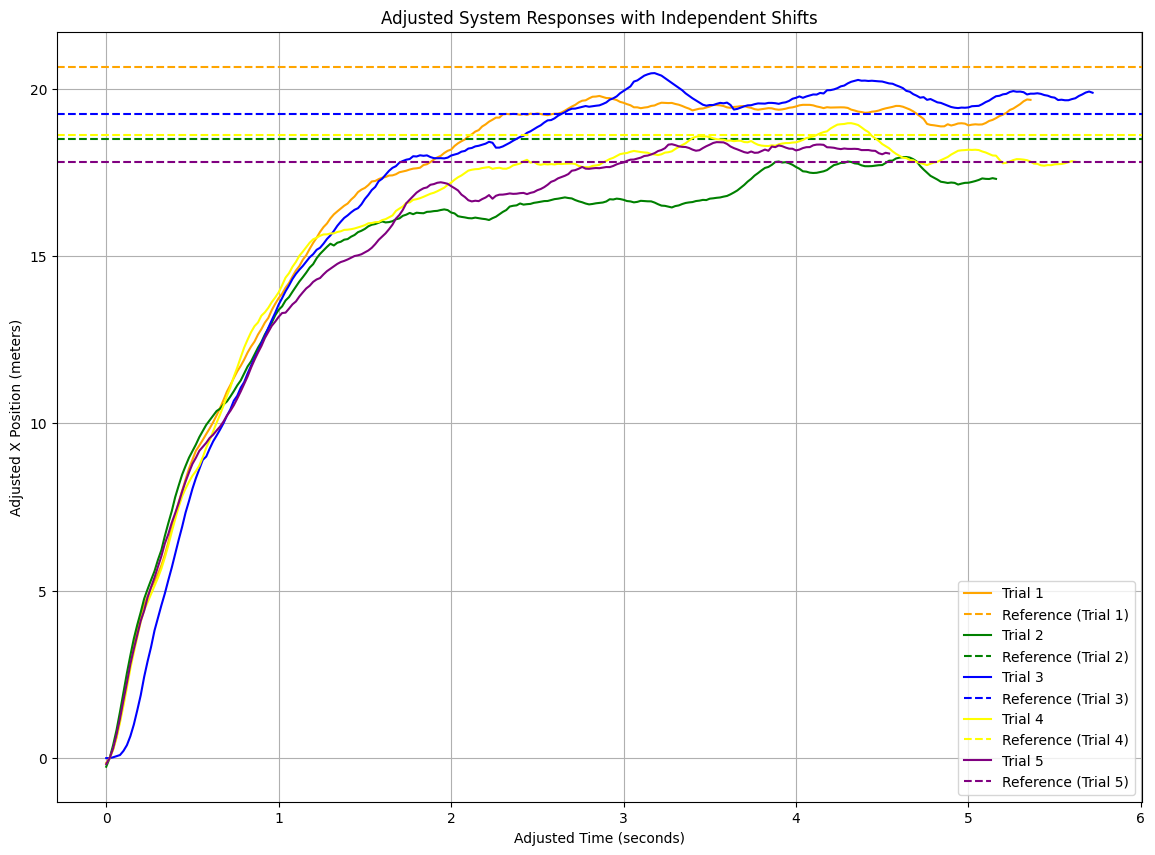

In [28]:
# Initialize a list to store adjusted datasets for each trial
adjusted_datasets = []
shifts = []
# Calculate and apply the shift for each trial
for i, step_start_time in enumerate(all_step_start_times[::2]):
    # Identify the trial data and its start point
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = roll2_step_data[(roll2_step_data['Time'] >= step_start_time) & 
                                  (roll2_step_data['Time'] <= step_start_time + observation_duration)]
    
    # Calculate the shift needed to start at X=0, using the first X position at or after t=0.01 seconds
    initial_x_at_001 = trial_data[trial_data['Time'] >= step_start_time + 0.01]['Roll_deg'].iloc[0]
    shift = -initial_x_at_001
    shifts.append(shift)
    
    # Apply the shift
    adjusted_data = trial_data.copy()
    adjusted_data['Roll_deg'] = adjusted_data['Roll_deg'] + shift
    
    
    # Adjust the time to start from 0 for plotting
    adjusted_data['Adjusted Time'] = adjusted_data['Time'] - step_start_time
    
    adjusted_datasets.append(adjusted_data)

reference_input = 20
# Plot the adjusted X positions over time for each trial
plt.figure(figsize=(14, 10))
for i, adjusted_data in enumerate(adjusted_datasets):
    plt.plot(adjusted_data['Adjusted Time'], adjusted_data['Roll_deg'], label=f'Trial {i+1}', color=colors[i])
    shifted_reference = reference_input + shifts[i]
    plt.axhline(y=shifted_reference, color=colors[i], linestyle='--', label=f'Reference (Trial {i+1})')
    

plt.title('Adjusted System Responses with Independent Shifts')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('Adjusted X Position (meters)')
plt.grid(True)
plt.legend()
plt.show()


In [29]:
# Initialize an empty DataFrame with columns for common time and each trial
column_names = ['Common Time']
combined_data = pd.DataFrame(columns=column_names)

# Iterate over each trial and merge the data into the combined DataFrame
for i, step_start_time in enumerate(all_step_start_times[::2]):
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = roll2_step_data[(roll2_step_data['Time'] >= step_start_time) & 
                                  (roll2_step_data['Time'] <= step_start_time + observation_duration)]
    trial_data_adjusted = trial_data.copy()
    trial_data_adjusted['Common Time'] = trial_data['Time'] - step_start_time + time_offset
    
    # Merge the trial data into the combined DataFrame
    combined_data = pd.merge(combined_data, trial_data_adjusted[['Common Time', 'Roll_deg']], on='Common Time', how='outer', sort=True)
    combined_data = combined_data.rename(columns={'Roll_deg': f'Trial {i+1}'})

# Fill any missing values with NaN or interpolate if desired
combined_data = combined_data.fillna(method='ffill')

combined_data.head()

,Common Time,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.01,-0.797770,1.237264,0.764432,1.222153,2.005175
1,0.03,-0.797770,1.237264,0.765752,1.390163,2.184560
2,0.03,-0.797770,1.495666,0.765752,1.390163,2.184560
3,0.03,-0.654603,1.495666,0.765752,1.390163,2.184560
4,0.05,-0.654603,1.495666,0.765752,1.635510,2.184560


In [30]:
step_info_list = []
x_values = combined_data['Trial 1'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=20)
step_info['Title'] = 'Step Analysis of Trial 1'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 2'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=20)
step_info['Title'] = 'Step Analysis of  Trial 2'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 3'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=20)
step_info['Title'] = 'Step Analysis of Trial 3'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 4'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=20)
step_info['Title'] = 'Step Analysis of  Trial 4'
step_info_list.append(step_info)

print(step_info)
x_values = combined_data['Trial 5'].values
time_values = combined_data['Common Time'].values
step_info = control.step_info(x_values, T=time_values, SettlingTimeThreshold=0.05, yfinal=20)
step_info['Title'] = 'Step Analysis of Trial 5'
step_info_list.append(step_info)

print(step_info_list)

{'RiseTime': 1.9999999999999998, 'SettlingTime': 5.3500000000000005, 'SettlingMin': 18.06223090330532, 'SettlingMax': 20, 'Overshoot': 0, 'Undershoot': 3.9888516842911246, 'Peak': 19.12693396235798, 'PeakTime': 2.87, 'SteadyStateValue': 20, 'Title': 'Step Analysis of Trial 1'}
{'RiseTime': 2.3199999999999985, 'SettlingTime': nan, 'SettlingMin': 17.94600358834097, 'SettlingMax': 20, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 19.453070387932403, 'PeakTime': 4.65, 'SteadyStateValue': 20, 'Title': 'Step Analysis of  Trial 2'}
{'RiseTime': 1.4200000000000017, 'SettlingTime': 4.4699999999999935, 'SettlingMin': 18.073381444838095, 'SettlingMax': 21.229694111996842, 'Overshoot': 6.1484705599842115, 'Undershoot': 0, 'Peak': 21.229694111996842, 'PeakTime': 3.1899999999999924, 'SteadyStateValue': 20, 'Title': 'Step Analysis of Trial 3'}
{'RiseTime': 1.7199999999999989, 'SettlingTime': 2.350000000000003, 'SettlingMin': 18.067597030751497, 'SettlingMax': 20.357736548623237, 'Overshoot': 1.78868274311

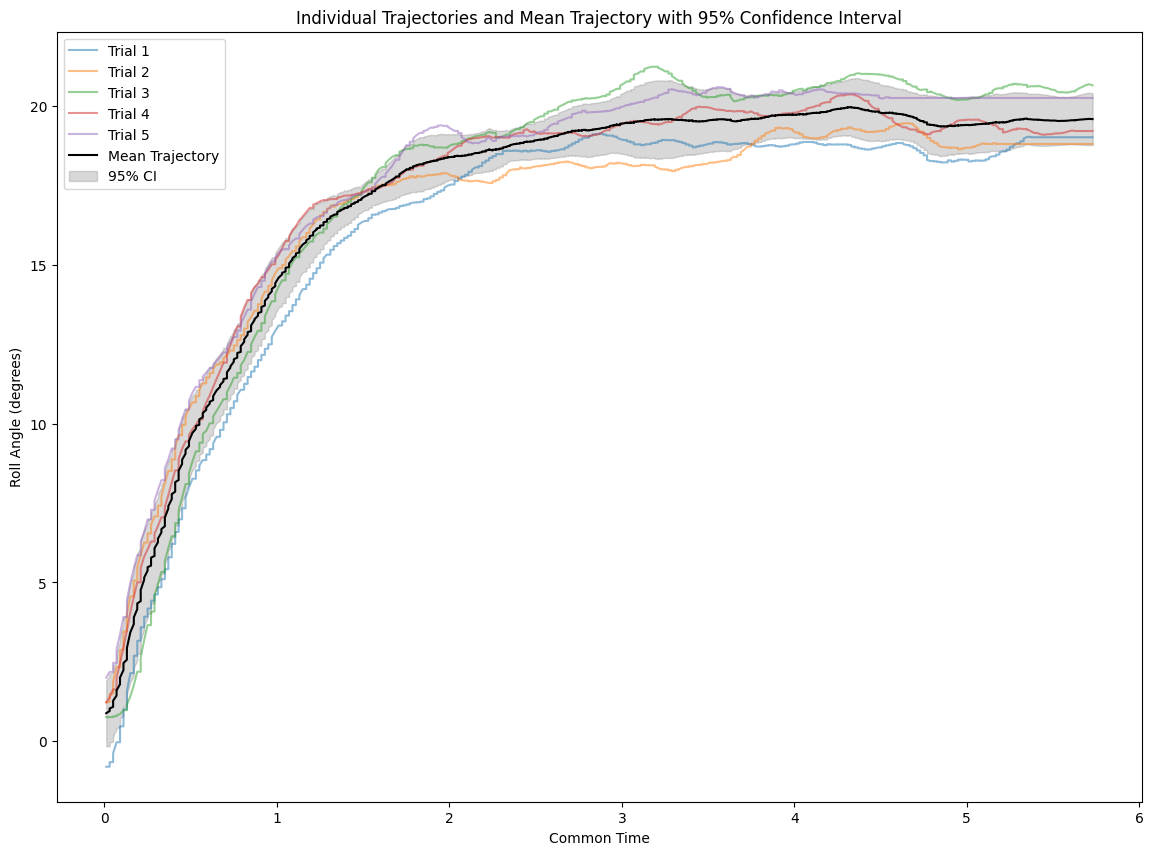

In [31]:
# Calculate the mean and standard deviation across trials at each time step
combined_data['Mean'] = combined_data[['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']].mean(axis=1)
combined_data['Std'] = combined_data[['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']].std(axis=1)

# Plot the individual trajectories
plt.figure(figsize=(14, 10))
for i in range(1, 6):
    plt.plot(combined_data['Common Time'], combined_data[f'Trial {i}'], label=f'Trial {i}', alpha=0.5)

# Plot the mean trajectory
plt.plot(combined_data['Common Time'], combined_data['Mean'], label='Mean Trajectory', color='black')

# Plot the confidence interval
plt.fill_between(combined_data['Common Time'], 
                 combined_data['Mean'] - combined_data['Std'], 
                 combined_data['Mean'] + combined_data['Std'], 
                 alpha=0.3, color='gray', label='95% CI')

plt.xlabel('Common Time')
plt.ylabel('Roll Angle (degrees)')
plt.title('Individual Trajectories and Mean Trajectory with 95% Confidence Interval')
plt.legend()
plt.show()


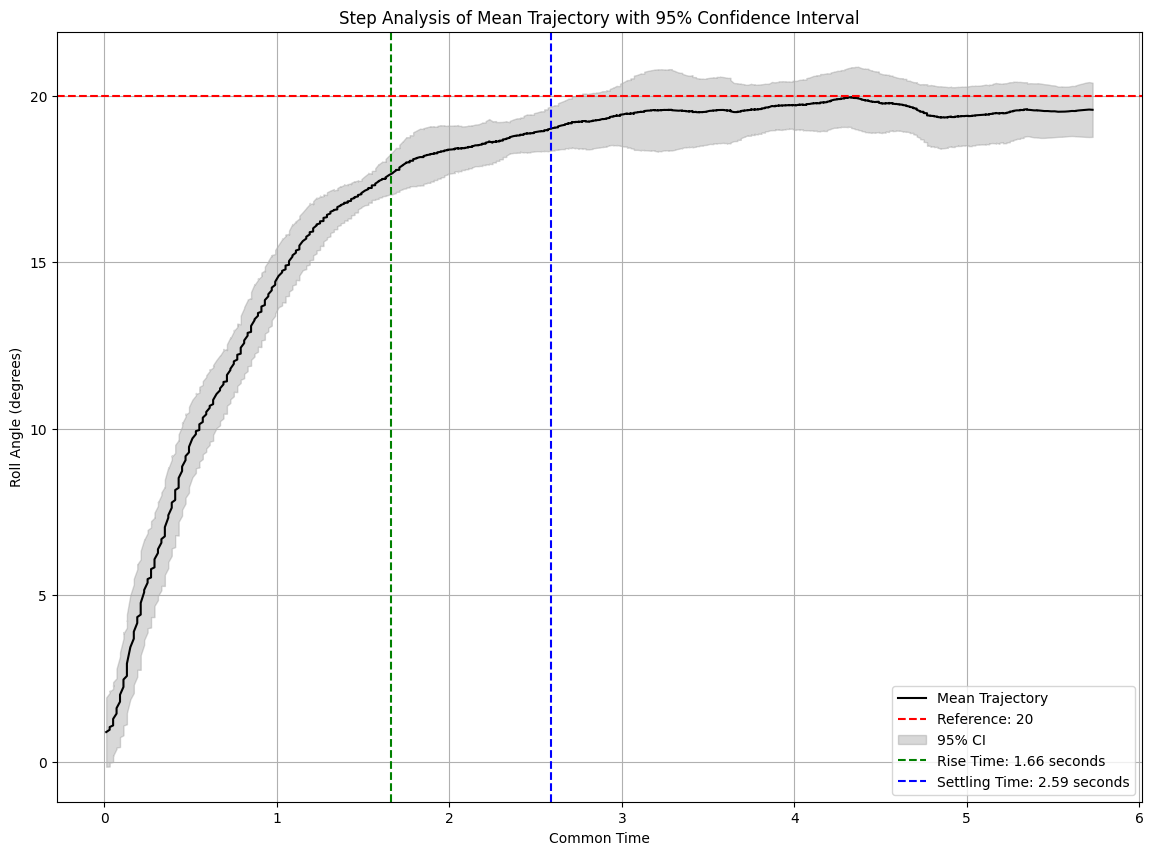

In [32]:
import control


# Assuming 'combined_data' is your DataFrame with 'Mean' as the mean signal and 'Common Time' as the time vector
mean_signal = combined_data['Mean'].values  # The mean signal as a 1D numpy array
time = combined_data['Common Time'].values  # The corresponding time vector as a 1D numpy array

# Calculate step response characteristics for the mean signal, now providing both the signal and its time vector
step_info = control.step_info(mean_signal, T=time, SettlingTimeThreshold=0.05, yfinal=20)

# Plot the mean signal with annotations for rise time and settling time
plt.figure(figsize=(14, 10))
plt.plot(time, mean_signal, label='Mean Trajectory', color='black')
plt.axhline(y=20, color='red', linestyle='--', label='Reference: 20')
plt.fill_between(time, mean_signal - combined_data['Std'], mean_signal + combined_data['Std'], alpha=0.3, color='gray', label='95% CI')
plt.axvline(x=step_info['RiseTime'], color='green', linestyle='--', label=f'Rise Time: {step_info["RiseTime"]:.2f} seconds')
plt.axvline(x=step_info['SettlingTime'], color='blue', linestyle='--', label=f'Settling Time: {step_info["SettlingTime"]:.2f} seconds')
plt.xlabel('Common Time')
plt.ylabel('Roll Angle (degrees)')
plt.title('Step Analysis of Mean Trajectory with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

# Scenario 1: Mean Trajectory
step_info['Title'] = 'Step Analysis of Mean Trajectory with 95% Confidence Interval'
step_info_list.append(step_info)


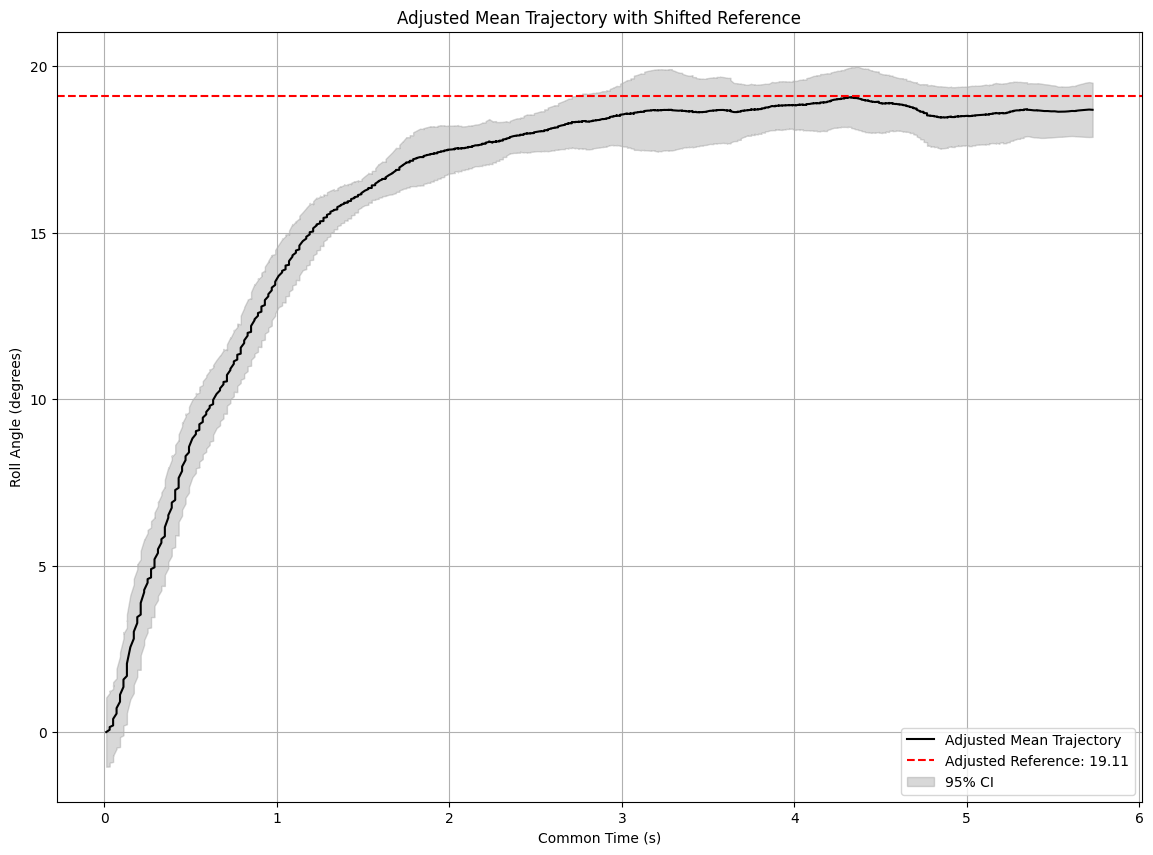

In [33]:
# Calculate the shift needed to start the mean trajectory at zero
shift_value = combined_data['Mean'].iloc[0]

# Apply the shift to the mean trajectory
shifted_mean_signal = combined_data['Mean'] - shift_value

# Adjust the reference of 0.25 by the shift value
adjusted_reference = 20 - shift_value


# Plotting
plt.figure(figsize=(14, 10))
plt.plot(time, shifted_mean_signal, label='Adjusted Mean Trajectory', color='black')
plt.axhline(y=adjusted_reference, color='red', linestyle='--', label=f'Adjusted Reference: {adjusted_reference:.2f}')

# Optionally, if you have the standard deviation for the 95% CI
std_dev = combined_data['Std']  # Assuming this exists
plt.fill_between(time, shifted_mean_signal - std_dev, shifted_mean_signal + std_dev, alpha=0.3, color='gray', label='95% CI')

plt.xlabel('Common Time (s)')
plt.ylabel('Roll Angle (degrees)')
plt.title('Adjusted Mean Trajectory with Shifted Reference')
plt.legend()
plt.grid(True)
plt.show()

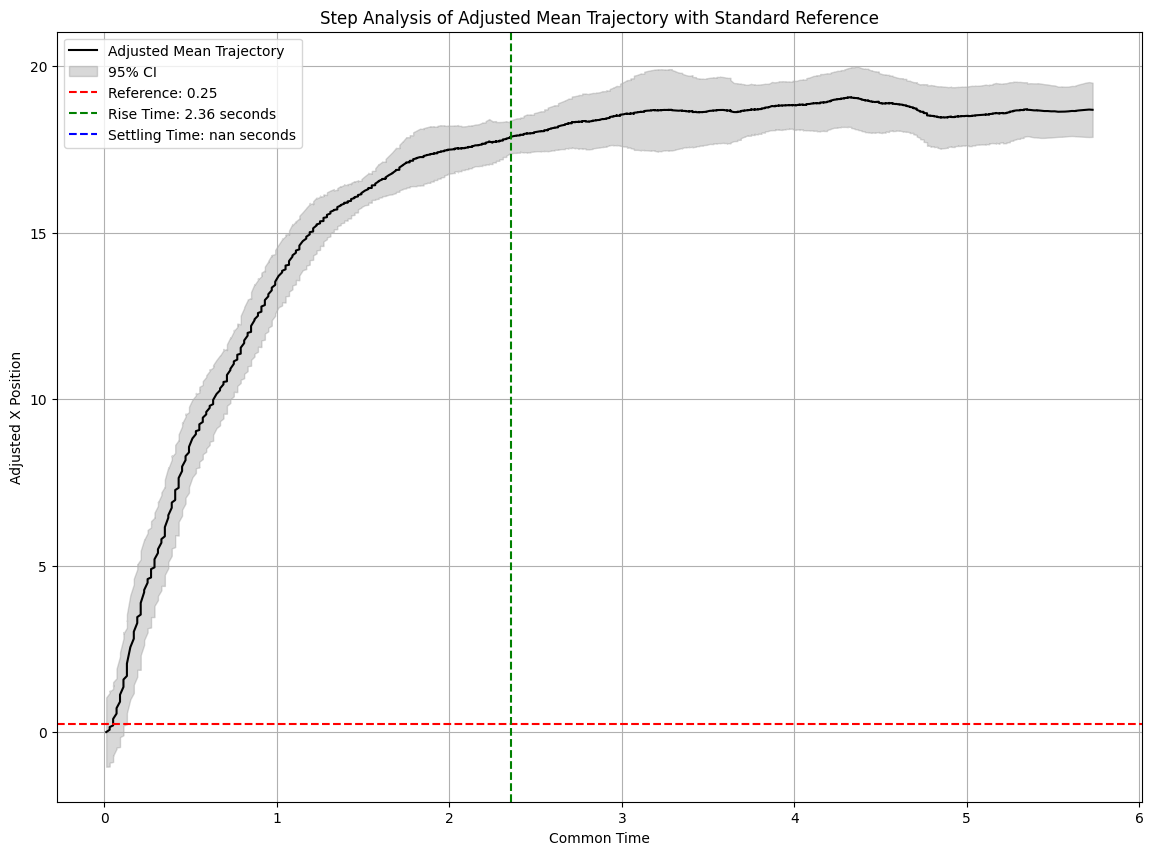

In [34]:
# Assuming 'combined_data' DataFrame has 'Common Time' as the time vector
time = combined_data['Common Time'].values  # The corresponding time vector as a 1D numpy array

# Calculate step response characteristics for the shifted mean signal, now providing both the signal and its time vector
# Note: yfinal is adjusted to match the shifted reference
step_info = control.step_info(shifted_mean_signal.values, T=time, SettlingTimeThreshold=0.05, yfinal=20)

step_info['Title'] = 'Step Analysis of Adjusted Mean Trajectory with Standard Reference'
step_info_list.append(step_info)

# Plot the shifted mean signal with annotations for rise time and settling time
plt.figure(figsize=(14, 10))
plt.plot(time, shifted_mean_signal, label='Adjusted Mean Trajectory', color='black')
plt.fill_between(time, shifted_mean_signal - combined_data['Std'], shifted_mean_signal + combined_data['Std'], alpha=0.3, color='gray', label='95% CI')
plt.axhline(y=0.25, color='red', linestyle='--', label=f'Reference: 0.25')
plt.axvline(x=step_info['RiseTime'], color='green', linestyle='--', label=f'Rise Time: {step_info["RiseTime"]:.2f} seconds')
plt.axvline(x=step_info['SettlingTime'], color='blue', linestyle='--', label=f'Settling Time: {step_info["SettlingTime"]:.2f} seconds')
plt.xlabel('Common Time')
plt.ylabel('Adjusted X Position')
plt.title('Step Analysis of Adjusted Mean Trajectory with Standard Reference')
plt.legend()
plt.grid(True)
plt.show()

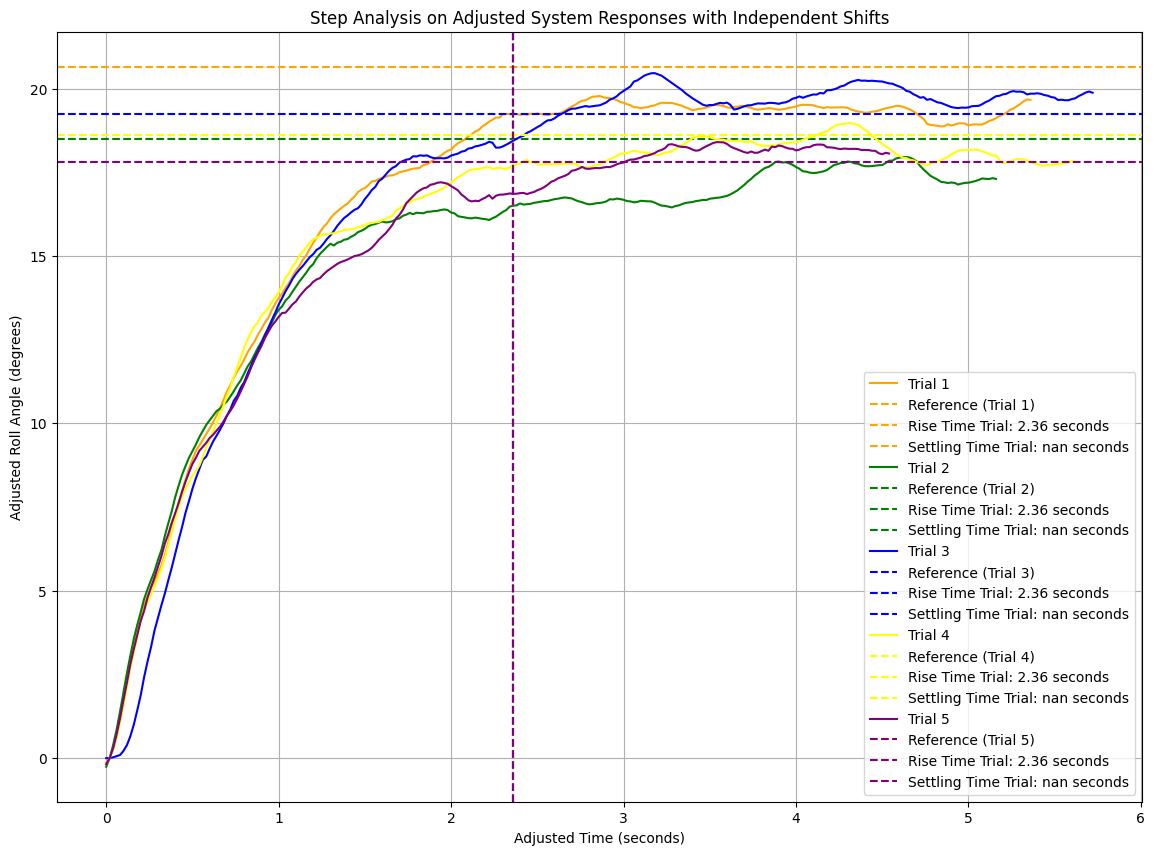

In [35]:
# Initialize a list to store adjusted datasets for each trial
adjusted_datasets = []
shifts = []
# Calculate and apply the shift for each trial
for i, step_start_time in enumerate(all_step_start_times[::2]):
    # Identify the trial data and its start point
    observation_duration = intervals[i] if i < len(intervals) else intervals[-1]
    trial_data = roll2_step_data[(roll2_step_data['Time'] >= step_start_time) & 
                                  (roll2_step_data['Time'] <= step_start_time + observation_duration)]
    
    # Calculate the shift needed to start at X=0, using the first X position at or after t=0.01 seconds
    initial_x_at_001 = trial_data[trial_data['Time'] >= step_start_time + 0.01]['Roll_deg'].iloc[0]
    shift = -initial_x_at_001
    shifts.append(shift)
    
    # Apply the shift
    adjusted_data = trial_data.copy()
    adjusted_data['Roll_deg'] = adjusted_data['Roll_deg'] + shift
    
    
    # Adjust the time to start from 0 for plotting
    adjusted_data['Adjusted Time'] = adjusted_data['Time'] - step_start_time
    
    adjusted_datasets.append(adjusted_data)

reference_input = 20
# Plot the adjusted X positions over time for each trial
plt.figure(figsize=(14, 10))
for i, adjusted_data in enumerate(adjusted_datasets):
    plt.plot(adjusted_data['Adjusted Time'], adjusted_data['Roll_deg'], label=f'Trial {i+1}', color=colors[i])
    shifted_reference = reference_input + shifts[i]
    plt.axhline(y=shifted_reference, color=colors[i], linestyle='--', label=f'Reference (Trial {i+1})')
    # Convert the Series to numpy arrays before passing them to control.step_info
    x_values = adjusted_data['Roll_deg'].to_numpy()
    time_values = adjusted_data['Adjusted Time'].to_numpy()
    plt.axvline(x=step_info['RiseTime'], color=colors[i], linestyle='--', label=f'Rise Time Trial: {step_info["RiseTime"]:.2f} seconds')
    plt.axvline(x=step_info['SettlingTime'], color=colors[i], linestyle='--', label=f'Settling Time Trial: {step_info["SettlingTime"]:.2f} seconds')
    

plt.title('Step Analysis on Adjusted System Responses with Independent Shifts')
plt.xlabel('Adjusted Time (seconds)')
plt.ylabel('Adjusted Roll Angle (degrees)')
plt.grid(True)
plt.legend()
plt.show()


In [36]:
# Convert the list of step info dictionaries into a DataFrame
step_info_df = pd.DataFrame(step_info_list)

# Select and rename the columns we are interested in
step_info_df = step_info_df[['Title', 'RiseTime', 'SettlingTime']]

# Display the DataFrame
step_info_df

latex_table = step_info_df.to_latex(index=False, float_format="%.2f")

print(latex_table)

\begin{tabular}{lrr}
\toprule
Title & RiseTime & SettlingTime \\
\midrule
Step Analysis of Trial 1 & 2.00 & 5.35 \\
Step Analysis of  Trial 2 & 2.32 & NaN \\
Step Analysis of Trial 3 & 1.42 & 4.47 \\
Step Analysis of  Trial 4 & 1.72 & 2.35 \\
Step Analysis of Trial 5 & 1.66 & 2.29 \\
Step Analysis of Mean Trajectory with 95% Confidence Interval & 1.66 & 2.59 \\
Step Analysis of Adjusted Mean Trajectory with Standard Reference & 2.36 & NaN \\
\bottomrule
\end{tabular}

